In [1]:
# Set up the environment
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The goal
What are common features among colleges and universities that have closed in the last decade?
Using these features, is it possible to predict which schools are in danger of closing in the near future?
Are there steps that schools can take to mitigate the features which may lead to their closing?

# Data collection
The data come from the US Department of Education College Scorecard, which is available on Kaggle and from the US Department of Education at https://collegescorecard.ed.gov/data/.

In [2]:
# Load the csv files year by year; add a year column and merge them into one dataframe
filepath = "./data/raw/11_6609_bundle_archive/"
#year = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
year = ['2010', '2011', '2012', '2013']

df_dict = {}

fields = ['OPEID','INSTNM','CITY', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL','region', 'ADM_RATE',\
         'UGDS', 'CURROPER', 'NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P','TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC',\
         'C150_4', 'C150_L4','RET_FT4','RET_FTL4','RET_PT4','RET_PTL4','PCTFLOAN','UG25abv',\
         'COMP_ORIG_YR4_RT','WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT', 'DEBT_MDN']

for yr in year:
    filename = filepath + "MERGED" + yr + "_PP.csv"
    print(filename)
    df_dict[yr] = pd.read_csv(filename, usecols=fields, low_memory=False)
    df_dict[yr]['Year'] = yr

./data/raw/11_6609_bundle_archive/MERGED2010_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2011_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2012_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2013_PP.csv


In [3]:
data = pd.concat([df for df in df_dict.values()], ignore_index=True)

## Data organization
Create a file structure (and add work to GitHub repo)

In [4]:
#Create directories for various components of the project
#os.mkdir("data")
#os.mkdir("data/raw")
#os.mkdir("data/interim")
#os.mkdir("data/processed")
#os.mkdir("data/external")
#os.mkdir("figures")
#os.mkdir("models")

In [5]:
# Look at basic info about the dataframe - column names, summary information
data.shape

(30686, 32)

In [6]:
data.head()

OPEID                               INSTNM        CITY  NUMBRANCH  \
0  00100200             Alabama A & M University      Normal          1   
1  00105200  University of Alabama at Birmingham  Birmingham          1   
2  02503400                   Amridge University  Montgomery          1   
3  00105500  University of Alabama at Huntsville  Huntsville          1   
4  00100500             Alabama State University  Montgomery          1   

   PREDDEG  HIGHDEG  CONTROL  region  ADM_RATE     UGDS  ...  RET_FTL4  \
0        3        4        1     5.0    0.5129   4930.0  ...       NaN   
1        3        4        1     5.0    0.8243  10661.0  ...       NaN   
2        3        4        2     5.0    0.7143    370.0  ...       NaN   
3        3        4        1     5.0    0.6614   5828.0  ...       NaN   
4        3        4        1     5.0    0.4372   4882.0  ...       NaN   

   RET_PT4  RET_PTL4  PCTFLOAN  UG25abv  COMP_ORIG_YR4_RT  WDRAW_ORIG_YR4_RT  \
0   0.5000       NaN    0.7411      NaN    0.228752978554     0.233518665608   
1   0.7000       NaN    0.4918      NaN     0.39152007217     0.191249436175   
2      NaN       NaN    0.7500      NaN    0.376470588235                0.3   
3   0.5385       NaN    0.4633      NaN     0.35009487666     0.167931688805   
4   0.4167       NaN    0.8601      NaN    0.094877764843     0.363213038417   

    ENRL_ORIG_YR4_RT  DEBT_MDN  Year  
0     0.162827640985     19000  2010  
1     0.115922417682     15296  2010  
2  PrivacySuppressed     13853  2010  
3     0.120493358634     15000  2010  
4     0.115832363213     16500  2010  

[5 rows x 32 columns]

In [7]:
data.columns

Index(['OPEID', 'INSTNM', 'CITY', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL',
       'region', 'ADM_RATE', 'UGDS', 'CURROPER', 'NPT4_PUB', 'NPT4_PRIV',
       'COSTT4_A', 'COSTT4_P', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC',
       'C150_4', 'C150_L4', 'RET_FT4', 'RET_FTL4', 'RET_PT4', 'RET_PTL4',
       'PCTFLOAN', 'UG25abv', 'COMP_ORIG_YR4_RT', 'WDRAW_ORIG_YR4_RT',
       'ENRL_ORIG_YR4_RT', 'DEBT_MDN', 'Year'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30686 entries, 0 to 30685
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OPEID              30686 non-null  object 
 1   INSTNM             30686 non-null  object 
 2   CITY               30686 non-null  object 
 3   NUMBRANCH          30686 non-null  int64  
 4   PREDDEG            30686 non-null  int64  
 5   HIGHDEG            30686 non-null  int64  
 6   CONTROL            30686 non-null  int64  
 7   region             30685 non-null  float64
 8   ADM_RATE           9183 non-null   float64
 9   UGDS               28093 non-null  float64
 10  CURROPER           30686 non-null  int64  
 11  NPT4_PUB           7470 non-null   float64
 12  NPT4_PRIV          16436 non-null  float64
 13  COSTT4_A           16485 non-null  float64
 14  COSTT4_P           10026 non-null  float64
 15  TUITFTE            29133 non-null  float64
 16  INEXPFTE           291

In [9]:
data.nunique()

OPEID                15737
INSTNM                9048
CITY                  2642
NUMBRANCH               39
PREDDEG                  5
HIGHDEG                  5
CONTROL                  3
region                  10
ADM_RATE              4838
UGDS                  7162
CURROPER                 2
NPT4_PUB              5941
NPT4_PRIV            12122
COSTT4_A             12947
COSTT4_P              8096
TUITFTE              15862
INEXPFTE             11882
AVGFACSAL             7243
PFTFAC                6036
C150_4                4954
C150_L4               5810
RET_FT4               3866
RET_FTL4              4143
RET_PT4               1101
RET_PTL4              2801
PCTFLOAN              8365
UG25abv               6448
COMP_ORIG_YR4_RT     10207
WDRAW_ORIG_YR4_RT     9038
ENRL_ORIG_YR4_RT      5631
DEBT_MDN              7093
Year                     4
dtype: int64

In [10]:
data.describe().T

count          mean           std          min           25%  \
NUMBRANCH  30686.0      7.427557     22.229036       1.0000      1.000000   
PREDDEG    30686.0      1.797530      1.031728       0.0000      1.000000   
HIGHDEG    30686.0      2.176367      1.305776       0.0000      1.000000   
CONTROL    30686.0      2.204882      0.839021       1.0000      1.000000   
region     30685.0      4.599674      2.173260       0.0000      3.000000   
ADM_RATE    9183.0      0.670812      0.211303       0.0000      0.534500   
UGDS       28093.0   2413.799238   5711.277975       0.0000    131.000000   
CURROPER   30686.0      0.910089      0.286058       0.0000      1.000000   
NPT4_PUB    7470.0   8967.824096   4483.679316   -6359.0000   5767.000000   
NPT4_PRIV  16436.0  17812.166951   7422.618685 -103168.0000  12920.500000   
COSTT4_A   16485.0  23396.867759  11663.707801    2200.0000  13573.000000   
COSTT4_P   10026.0  19521.881309   7820.262543       0.0000  14168.250000   
TUITFTE    29133.0   9409.251639  12472.918001       0.0000   3756.000000   
INEXPFTE   29133.0   6595.052552  10519.012261       0.0000   2913.000000   
AVGFACSAL  18209.0   5873.277665   2181.700717     209.0000   4427.000000   
PFTFAC     17197.0      0.541034      0.298259       0.0000      0.285700   
C150_4      9560.0      0.474715      0.214801       0.0000      0.321100   
C150_L4    15629.0      0.560156      0.260821       0.0000      0.329800   
RET_FT4     9388.0      0.687696      0.196856       0.0000      0.596925   
RET_FTL4   15647.0      0.685946      0.175226       0.0000      0.570200   
RET_PT4     5929.0      0.454808      0.291270       0.0000      0.259300   
RET_PTL4    9157.0      0.553330      0.256341       0.0000      0.376600   
PCTFLOAN   27887.0      0.531217      0.295645       0.0000      0.319150   
UG25abv    14033.0      0.425814      0.226099       0.0005      0.261800   

                  50%           75%        max  
NUMBRANCH      1.0000      2.000000      141.0  
PREDDEG        2.0000      3.000000        4.0  
HIGHDEG        2.0000      4.000000        4.0  
CONTROL        2.0000      3.000000        3.0  
region         5.0000      6.000000        9.0  
ADM_RATE       0.6890      0.825300        1.0  
UGDS         497.0000   2047.000000   253594.0  
CURROPER       1.0000      1.000000        1.0  
NPT4_PUB    8201.0000  11774.500000    32921.0  
NPT4_PRIV  18051.0000  22302.000000    87570.0  
COSTT4_A   21931.0000  29798.000000    74473.0  
COSTT4_P   18400.5000  23800.750000    96720.0  
TUITFTE     8048.0000  12745.000000  1160056.0  
INEXPFTE    4773.0000   7400.000000   606843.0  
AVGFACSAL   5650.0000   7049.000000    24892.0  
PFTFAC         0.5000      0.808500        1.0  
C150_4         0.4658      0.622325        1.0  
C150_L4        0.6102      0.765800        1.0  
RET_FT4        0.7174      0.818600        1.0  
RET_FTL4       0.6918      0.814300        1.0  
RET_PT4        0.4516      0.625000        1.0  
RET_PTL4       0.5000      0.750000        1.0  
PCTFLOAN       0.5962      0.766550        1.0  
UG25abv        0.4228      0.589700        1.0

## Explore data types 
Many of the columns that I expected to be numerical data were actually classifed as strings. I tried to convert them to numbers, but got an error message, so I explored the content of the colummns and the data dictionary to see what the problem was.

For privacy reasons, some of the columns include data is coded as "PrivacySupressed".

In [11]:
# Look at individual column information to assess and assign data types
print((data.COMP_ORIG_YR4_RT.value_counts()/len(data.COMP_ORIG_YR4_RT)) *100)
print((data.COMP_ORIG_YR4_RT.isnull().sum() /len(data.COMP_ORIG_YR4_RT)) *100)

PrivacySuppressed    9.199635
0                    2.176888
0.319006249047       0.459493
0.343498817967       0.417128
0.312364425163       0.387799
                       ...   
0.507755946225       0.003259
0.047498594716       0.003259
0.121727748691       0.003259
0.179611650485       0.003259
0.66991112992        0.003259
Name: COMP_ORIG_YR4_RT, Length: 10207, dtype: float64
29.524864759173564


In [12]:
# Replace "PrivacySuppressed" with null values (NaN)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace("PrivacySuppressed", "NaN")

## Combine columns

There are several columns with the same information for different categories of schools (Public vs Private, Academic Year vs Annual Year). Each of the individual columns is missing a lot of data, but there would be less missing data if they were combined.

In [13]:
#Compare Net Price columns for private and public, to see if they can be combined into one column.
net_price = data[['NPT4_PUB', 'NPT4_PRIV']]
not_null = net_price.notnull()
eitherdf = net_price.loc[(not_null['NPT4_PUB'])|(not_null['NPT4_PRIV'])]

take_full = lambda s1, s2: s1 if np.isnan(s2) else s2

data['NetPrice'] = data['NPT4_PUB'].combine(data['NPT4_PRIV'], take_full)
data['Cost'] = data['COSTT4_P'].combine(data['COSTT4_A'], take_full)

In [14]:
data['NetPrice'].loc[data['NetPrice'].notnull()].shape

(23906,)

In [15]:
data['Cost'].loc[data['Cost'].notnull()].shape

(26511,)

## Percentage of null values per column

In [16]:
# Look at percentage of null values per column
nas=pd.DataFrame(data.isnull().sum().sort_values(ascending=False)/len(data),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

percent
RET_PT4            0.806785
OPEID              0.758391
NPT4_PUB           0.756567
RET_PTL4           0.701590
ADM_RATE           0.700743
RET_FT4            0.694062
C150_4             0.688457
COSTT4_P           0.673271
UG25abv            0.542690
C150_L4            0.490680
RET_FTL4           0.490093
NPT4_PRIV          0.464381
COSTT4_A           0.462784
PFTFAC             0.439582
AVGFACSAL          0.406602
ENRL_ORIG_YR4_RT   0.295249
WDRAW_ORIG_YR4_RT  0.295249
COMP_ORIG_YR4_RT   0.295249
NetPrice           0.220948
Cost               0.136056
PCTFLOAN           0.091214
DEBT_MDN           0.089324
UGDS               0.084501
TUITFTE            0.050609
INEXPFTE           0.050609
region             0.000033

In [17]:
# Get a list of columns with > 90% NAN values
to_drop = [column for column in data.columns if (data[column].isnull().sum()/len(data[column]) > 0.90)]
#data.isnull().sum()/len(data)

print("Columns to drop include: ", to_drop)

Columns to drop include:  []


My first attempt at data wrangling had many colums with missing values. Based on the data wrangling and exploratory data analysis has led me to refine the list of colums to import, which means there are no longer any columms with >90% missing values.

In [18]:
# Remove columns with > 90% NAN values from dataframe
data = data.drop(to_drop, axis=1)
#data.head()

# Convert data types

In [19]:
data_types = {"PREDDEG": 'category', "HIGHDEG": 'category', 'CONTROL':'category', 'region':'category', 
              'CURROPER':'bool', 'DEBT_MDN':'float64','COMP_ORIG_YR4_RT': 'float64', 
              'WDRAW_ORIG_YR4_RT':'float64', 'ENRL_ORIG_YR4_RT':'float64'}

for col in data_types.keys():
    data[col] = data[col].astype(data_types[col])

In [20]:
data['Year']= pd.to_datetime(data['Year'])

In [21]:
#Rename columns to be more descriptive
# col_names = ['Id','OPEID','Name','City','Zip','Predominant degree', 'Main branch', 'NumBranches',\
#             'Primary degree type', 'High degree', 'Control', 'StateCode','Region', \
#             'AdmissionRate', 'ACTMidpoint', 'SATAvg',\
#             'Enrollment-DegreeSeeking', \
#             'CURROPER','NetPrice-Private', 'AvgCost-AY', 'TuitionRevenue/FTE',\
#             'Expenditure/FTE','AvgFaculty Salary', 'Percent Fulltime Faculty', 'Completion-4yr', 'Completion<4yr','RetentionFT-4yr', \
#             'RetentionFT-<4yr','RetentionPT-4yr', 'RetentionPT-<4yr', 'PercentFedLoan','PercentAge>25', \
#             'PercentCompleted4yr', 'PercentWithdraw4yr', 'PercentEnrolled4yr',\
#             'PercentAidedLowIncome', 'PercentIndependent', 'PercentDependentLowIncome','PercentIndepentdentLowIncome',\
#             'PercentFirstGen','AvgIncomeDependent','AvgIncomeIndep','MedianDebt', \
#             'MedianDebtCompleters', 'MedianDebtNotComplete', 'PercentReceiveFedLoan','AvgAgeEntry', 'PercentFemale',\
#             'PercentMarried','PercentDependent','PercentVeteran', 'AvgFamilyIncome','MedianFamilyIncome',\
#             'MedianHouseholdIncome']
# data.columns = col_names
# data.set_index('Id').head()

In [22]:
# Look for duplicate rows
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

Empty DataFrame
Columns: [OPEID, INSTNM, CITY, NUMBRANCH, PREDDEG, HIGHDEG, CONTROL, region, ADM_RATE, UGDS, CURROPER, NPT4_PUB, NPT4_PRIV, COSTT4_A, COSTT4_P, TUITFTE, INEXPFTE, AVGFACSAL, PFTFAC, C150_4, C150_L4, RET_FT4, RET_FTL4, RET_PT4, RET_PTL4, PCTFLOAN, UG25abv, COMP_ORIG_YR4_RT, WDRAW_ORIG_YR4_RT, ENRL_ORIG_YR4_RT, DEBT_MDN, Year, NetPrice, Cost]
Index: []

[0 rows x 34 columns]

## Save wrangled data to .csv file

In [23]:
# Write complete dataframe to file.
data.to_csv('data/interim/scorecard.filtered.csv')

# Exploratory Data Analysis
## Initial questions about the data
1. How does price differ based on school control (public, private nonprofit, private for-profit)?
2. Does size (student enrollment and number of faculty) vary by control?
3. What factors contribute to schools closing? What is the distribution of closed schools (by region, size, control)
4. How does student debt relate to school size and control? Does student debt contribute to schools closing?

## More detailed exploration of null values

In [24]:
#Check for null values
nulldata = data.isnull().sum()
nulldata = pd.DataFrame(nulldata)
nulldata.columns = ["Count"]
nulldata['Percent'] = (data.isnull().sum())/data.shape[0]

print(nulldata.loc[nulldata['Percent']>0])

                   Count   Percent
OPEID              23272  0.758391
region                 1  0.000033
ADM_RATE           21503  0.700743
UGDS                2593  0.084501
NPT4_PUB           23216  0.756567
NPT4_PRIV          14250  0.464381
COSTT4_A           14201  0.462784
COSTT4_P           20660  0.673271
TUITFTE             1553  0.050609
INEXPFTE            1553  0.050609
AVGFACSAL          12477  0.406602
PFTFAC             13489  0.439582
C150_4             21126  0.688457
C150_L4            15057  0.490680
RET_FT4            21298  0.694062
RET_FTL4           15039  0.490093
RET_PT4            24757  0.806785
RET_PTL4           21529  0.701590
PCTFLOAN            2799  0.091214
UG25abv            16653  0.542690
COMP_ORIG_YR4_RT   11883  0.387245
WDRAW_ORIG_YR4_RT  12649  0.412208
ENRL_ORIG_YR4_RT   15002  0.488887
DEBT_MDN            4494  0.146451
NetPrice            6780  0.220948
Cost                4175  0.136056


The columms with the highest percentage of missing values are also columns that were combined in a previous step (NetPrice and Cost), so it is safe to delete those four columns.

The other columns with high missing rates are the RET columns (retention rates). For the time being, I'm going to keep those columns.

In [25]:
to_drop = ['NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P']
data = data.drop(to_drop, axis=1)
print(data.shape)

(30686, 30)


## Number and names of schools in the database
- How many rows are in the database?
- How many unique schools are in the database? By OPEID and by Name

In [26]:
n_data = data.shape[0]
print("There are ", n_data, " observations in the data")

n_opeid = data["OPEID"].nunique()
print("There are ", n_opeid, "unique OPEIDs in the data")
print(data.OPEID.value_counts())

There are  30686  observations in the data
There are  7408 unique OPEIDs in the data
03021500    3
01308800    2
02179907    2
01031904    2
04155300    2
           ..
02084800    1
00224940    1
02180600    1
01039500    1
00202200    1
Name: OPEID, Length: 7408, dtype: int64


In [27]:
data['INSTNM'] = data['INSTNM'].str.lower()
n_schools = data['INSTNM'].nunique()
print("There are ", n_schools, "unique school names in the data")
print(data.INSTNM.value_counts())

There are  9029 unique school names in the data
marinello school of beauty                                                  43
mccann school of business and technology                                    23
academy of hair design                                                      20
columbia college                                                            18
academy of cosmetology                                                      15
                                                                            ..
empire beauty school-jackson                                                 1
aurora st. luke's medical center-school of diagnostic medical sonography     1
the salon professional academy-south plainfield                              1
anamarc college-el paso east                                                 1
central mass school of massage and therapy inc                               1
Name: INSTNM, Length: 9029, dtype: int64


There are 7408 OPEID numbers and 9029 unique school names in the data, which means that some school names share OPEID numbers. However, there are also a fair number of null OPEID numbers too. To get a sense for the data, I think it will be important to know how schools names relate to the OPEID numbers.

How many school names occur only once in the database? What are those schools?

In [28]:
unique_names = data.INSTNM.value_counts(ascending = True)[data.INSTNM.value_counts()==1]
print(unique_names)

central mass school of massage and therapy inc                              1
anamarc college-el paso east                                                1
the salon professional academy-south plainfield                             1
aurora st. luke's medical center-school of diagnostic medical sonography    1
empire beauty school-jackson                                                1
                                                                           ..
utah college of massage therapy-salt lake city                              1
cao institute of aesthetics                                                 1
fortis institute-miami                                                      1
itt technical institute–morrisville                                         1
academy of hair design-beaumont                                             1
Name: INSTNM, Length: 1178, dtype: int64


There are 1178 schools names that are unique.

That means that there are roughly 8,000 school names that occur more than once. How many schools occur multiple times, and how many times do they occur?

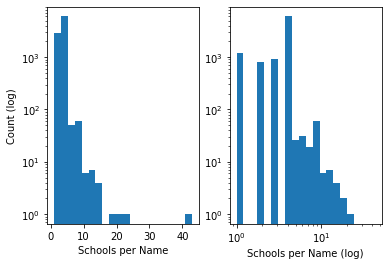

In [29]:
#Plot histogram of number of schools per Name
plt.subplot(1, 2, 1)
#plt.hist(data['Name'].value_counts())
hist, bins, _ = plt.hist(data['INSTNM'].value_counts(), bins=20)
plt.xlabel('Schools per Name')
plt.ylabel('Count (log)')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Converted to logarithmic scale
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data['INSTNM'].value_counts(), bins=logbins)
plt.xlabel('Schools per Name (log)')
plt.xscale('log')
plt.yscale('log')
plt.show()

While there are many unique school names, there are also equally many schools names with counts of between 10 & 100.

Now that we have a sense of how often school names are repeated in the database, we can explore the distribution of the OPEID.

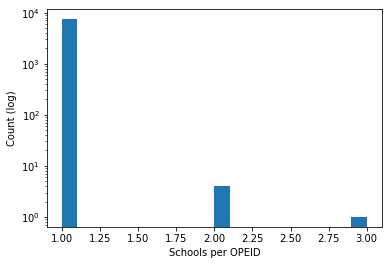

In [30]:
#Plot histogram of number of schools per OPEID
plt.hist(data['OPEID'].value_counts(), bins=20)
plt.xlabel('Schools per OPEID')
plt.ylabel('Count (log)')
plt.yscale('log')
plt.savefig('figures/OPEIDHistogram.png',bbox_inches='tight')

Previous exploration showed that ITT Technical Institute occured most often in the database. How many OPEIDs are associated with ITT Tech?

In [31]:
itt = data.loc[data['INSTNM'].str.startswith('itt tech')] # TECHNICAL INSTITUTE']
print(itt.OPEID.value_counts())

00732913    1
10732921    1
10732926    1
00732919    1
10732907    1
           ..
00732967    1
00732912    1
00732988    1
00732916    1
00732915    1
Name: OPEID, Length: 122, dtype: int64


## Explore categorical columns

Several columns from the original analysis have been discarded from the current analysis.

### Primary degree type

What are the values and distribution of the 'Primary degree type' column? 

They have been processed as categorical data, but coded numerically - which is appropriate for the machine learning model, but not easily human-readable.

In [32]:
predom_degree = {'0':'Not classified', '1':'Certificate', '2':'Associates', '3':'Bachelor', '4':'Graduate'}
data['PREDDEG_N'] = data['PREDDEG'].astype('str')
data.PREDDEG_N.value_counts()

for i in range(len(data.PREDDEG_N)):
    val = data.loc[i, 'PREDDEG_N']
    cat = predom_degree[val]
    data.loc[i, 'PREDDEG_N'] = cat

print(data.PREDDEG_N.value_counts())
print('There are ', data.PREDDEG_N.isnull().sum(), 'null values.')

Certificate       13323
Bachelor           8382
Associates         5927
Not classified     1845
Graduate           1209
Name: PREDDEG_N, dtype: int64
There are  0 null values.


### High degree awarded
What are the values and distributions in the 'High degree' column? Again, these should be categorical variables. How is the highest degree offered by an institution related to the primary degree type?

In [33]:
high_degree = {'0':'No degree', '1':'Certificate', '2':'Associates', '3':'Bachelor', '4':'Graduate'}
high_deg = data['HIGHDEG'].astype('str')

for i in range(len(high_deg)):
    val = high_deg[i]
    cat = high_degree[val]
    high_deg[i] = cat

high_deg.value_counts()

Certificate    10394
Graduate        8002
Associates      6953
Bachelor        3492
No degree       1845
Name: HIGHDEG, dtype: int64

Interestingly, there are 1845 non-degree-granting institutions, which is the same number as the "Not classifed" category in the 'Primary degree type' column.

The following pivot table and heat map shows how the primary degree type and the high degree type are related.

HIGHDEG     0      1     2     3     4
PREDDEG                               
0        1845      0     0     0     0
1           0  10394  2610   190   129
2           0      0  4343  1312   272
3           0      0     0  1990  6392
4           0      0     0     0  1209


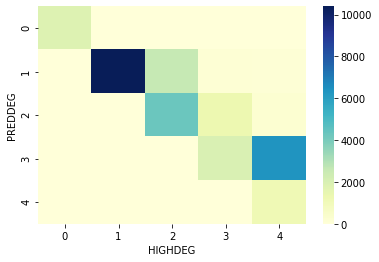

In [34]:
degree = data.pivot_table(index='PREDDEG', columns='HIGHDEG', aggfunc='size')
print(degree)
sns.heatmap(degree, cmap='YlGnBu')
plt.savefig('figures/PreddegHighDegHeatmap.png',bbox_inches='tight')

Indeed, the 1845 'Non-degree granting institutions' from 'High degree" are the same as the 'Not classified' schools from 'Primary degree type'.

Not surprisingly, the highest degrees offered at each institution are at least as high as their primary degree - there is not a primarily bachelor's granting institution with the highest degree of a certificate. However, the highest degree offered by a school may be higher than it's predominant degree type. For each school type, there are several primarily certificate institutions that also award graduate degrees.

A vast majority of the certificate granting instutitions and associates granting institutions offer a certificate and associate's degree, respectively, as their highest degree. However, 73.7% of the bachelor's granting institutions offer graduate degrees as their highest degree.

Given some of the predictability in the patterning between these two columns, it seems likely that only one of these categories will need to be kept in the final analysis. My inclination is to keep the 'Primary degree type' column, and delete the 'High degree' column.

### Control - Public, Private nonprofit and Private-for-profit
What is the distribution of schools by "Control" type? There are three types coded in the data: Public, Private nonprofit and Private for-profit

In [35]:
control_type = {'1':'Public', '2':'Private nonprofit', '3':'Private for-profit', 'nan':np.nan}

data['CONTROL_N'] = data['CONTROL'].astype('str')
data.CONTROL_N.value_counts()

for i in range(len(data.CONTROL_N)):
    val = data.loc[i, 'CONTROL_N']
    cat = control_type[val]
    data.loc[i,'CONTROL_N'] = cat

print(data.CONTROL_N.value_counts())
print('There are ', data.CONTROL_N.isnull().sum(), 'null values.')

# school_total = 34238 + 23041 + 21315
# percent_forprofit = (34238/school_total) * 100
# print("For profit = " , percent_forprofit,"%")

Private for-profit    14588
Public                 8301
Private nonprofit      7797
Name: CONTROL_N, dtype: int64
There are  0 null values.


There are approximately equal numbers of public and private non-profit schools. About 50% of the schools are private for-profit schools. It will be interesting to see how the control type interacts with the other variables like cost, size, and degree type.

CONTROL_N       Private for-profit  Private nonprofit  Public
PREDDEG_N                                                    
Associates                    2240                592    3095
Bachelor                      1087               4959    2336
Certificate                   9841                928    2554
Graduate                       188                960      61
Not classified                1232                358     255


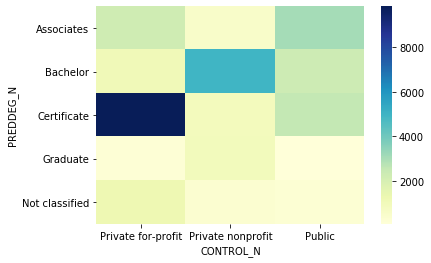

In [36]:
control_degree = data.pivot_table(index='PREDDEG_N', columns='CONTROL_N', aggfunc='size')
print(control_degree)
sns.heatmap(control_degree, cmap='YlGnBu')
plt.savefig('figures/PreddegControlHeatmap.png',bbox_inches='tight')

### Location - Region
How are the schools distributed by state and region?
While there is information available about the state of each school, the state and region would be highly correlated, since the region category is based on state.

In [37]:
region_dict = {"0.0": 'US Service Schools',
               "1.0": 'New England',  # CT, ME, MA, NH, RI, VT
               "2.0": 'Mid East',     # DE, DC, MD, NJ, NY, PA
               "3.0": 'Great Lakes',  # IL, IN, MI, OH, WI
               "4.0": 'Plains',       # IA, KS, MN, MO, NE, ND, SD
               "5.0": 'Southeast',    # AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV
               "6.0": 'Southwest',    # AZ, NM, OK, TX
               "7.0": 'Rocky Mountains', # CO, ID, MT, UT, WY
               "8.0": 'Far West',     # AK, CA, HI, NV, OR, WA
               "9.0": 'Outlying Areas' # AS, FM, GU, MH, MP, PR, PW, VI
}

data.region.value_counts()

5.0    7471
2.0    4726
3.0    4646
8.0    4320
6.0    3192
4.0    2702
1.0    1798
7.0    1178
9.0     648
0.0       4
Name: region, dtype: int64

## Explore columns with numerical values

### Number of branches
All of the schools were labeled as main branches in the original dataset, however some schools are associated with multiple branches.

1      20545
2       2599
3       1489
4        945
5        598
6        466
8        334
141      282
9        255
10       252
7        241
78       234
14       184
11       177
86       172
23       140
26       130
128      128
31       124
119      119
99       101
93        95
28        87
85        85
17        85
84        85
13        78
19        77
72        72
71        71
15        61
12        61
60        60
20        60
16        49
22        44
18        38
33        33
30        30
Name: NUMBRANCH, dtype: int64


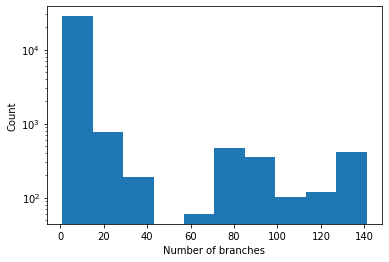

In [38]:
print(data['NUMBRANCH'].value_counts())
plt.hist(data['NUMBRANCH'])
plt.xlabel('Number of branches')
plt.ylabel('Count')
plt.yscale('log')
#plt.show()
plt.savefig('figures/NumbranchHist.png',bbox_inches='tight')

Most schools (20545) have only a single branch, while a few have more than 100 branches. It will be interesting to see how the number of branches might relate to school name and OPEID, particularly for the schools with more than 100 branches.

### Enrollment
The 'Enrollment-DegreeSeeking' column contains the number undergraduate degree-seeking students enrolled at the institution.

In [39]:
print('Null count: ', data['UGDS'].isnull().sum(), " - " , round(data['UGDS'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['UGDS']==0]
print('Schools with 0 Enrollment', zero.shape[0])
data['UGDS'].describe().T

Null count:  2593  -  8.0 %
Schools with 0 Enrollment 35


count     28093.000000
mean       2413.799238
std        5711.277975
min           0.000000
25%         131.000000
50%         497.000000
75%        2047.000000
max      253594.000000
Name: UGDS, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


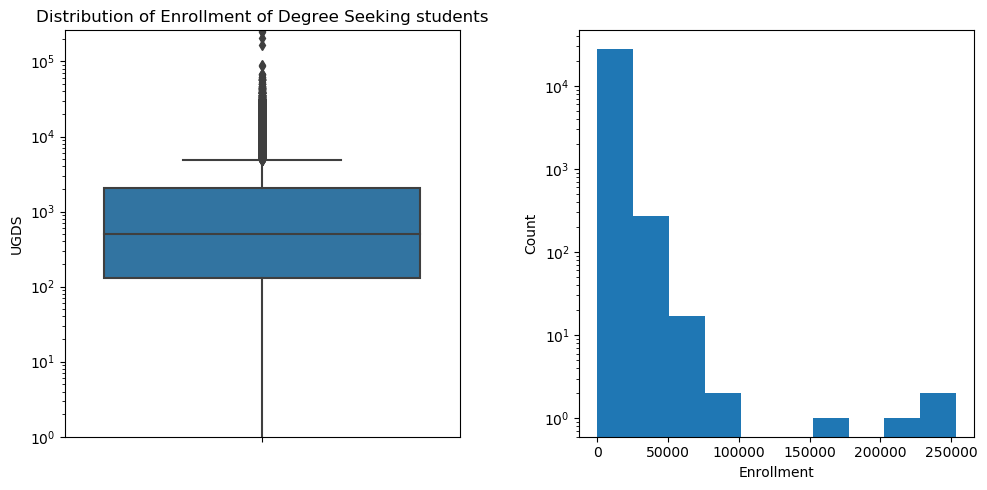

In [40]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('UGDS', data=data, orient='v')
plt.title('Distribution of Enrollment of Degree Seeking students')
plt.yscale('log')
plt.ylim([1, 260000])

plt.subplot(1, 2, 2)
plt.hist(data['UGDS'])
plt.xlabel('Enrollment')
plt.ylabel('Count')
#plt.xscale('log')
#plt.xlim([1, 10000000])
plt.yscale('log')
plt.tight_layout()
plt.show()

Given the wide range of enrollments and huge numbers of outliers, it might be helpful to convert enrollment into bins - small, medium, large, huge; or by number ranges

In [41]:
# Convert to bins - experiment with different values to see what works
bins=[0, 1, 150, 500, 2000, 260000]
labels = ['none', 'small', 'medium', 'large', 'xl']
#bins = {'none': 0, 'small': 1-150, 'medium': 151-500, 'large': 501-2000, 'xl': 2000+}
data["EnrollmentBins"]=pd.cut(data['UGDS'], bins, labels = labels )
data["EnrollmentBins"].value_counts()

small     7776
xl        7152
large     6852
medium    6270
none         8
Name: EnrollmentBins, dtype: int64

### Net Price
This column contains the net price for both 4 year and less than 4 year institutions.

In [42]:
print('Null count: ', data['NetPrice'].isnull().sum(), " - " , round(data['NetPrice'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['NetPrice']==0]
print('Schools with 0 Net Price', zero.shape[0])
data['NetPrice'].describe().T

Null count:  6780  -  22.0 %
Schools with 0 Net Price 8


count     23906.000000
mean      15048.541036
std        7808.037495
min     -103168.000000
25%        8799.000000
50%       14680.500000
75%       20432.750000
max       87570.000000
Name: NetPrice, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


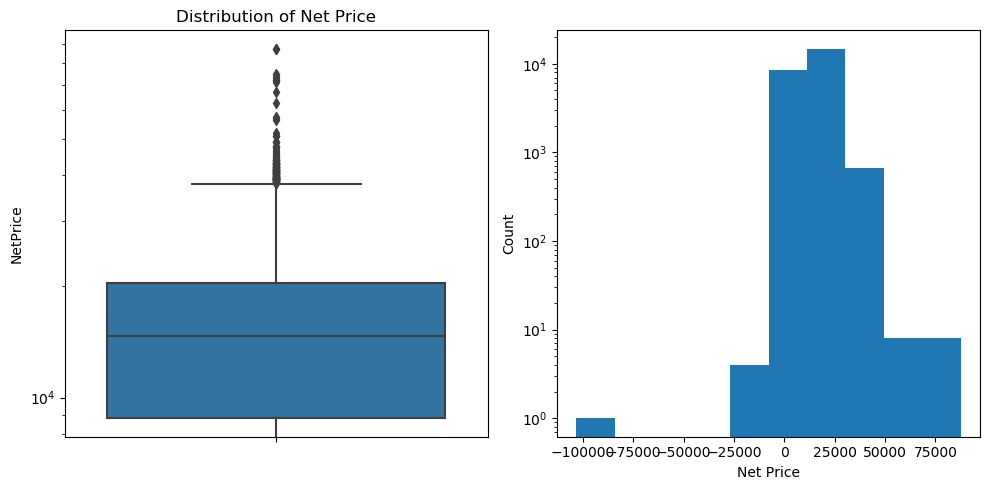

In [43]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('NetPrice', data=data, orient='v')
plt.title('Distribution of Net Price')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['NetPrice'])
plt.xlabel('Net Price')
plt.ylabel('Count')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [44]:
NegNetPrice = data.loc[data['NetPrice'] < 0 ]
print(NegNetPrice.shape)
print(NegNetPrice.NetPrice.describe())

(119, 33)
count       119.000000
mean      -3729.613445
std        9743.839336
min     -103168.000000
25%       -3517.000000
50%       -2630.000000
75%        -957.000000
max         -12.000000
Name: NetPrice, dtype: float64


There are 119 schools with negative values for net price, ranging from -103168 to -12.
I'm not sure what the negative net price means.

### Cost
This column include the cost for all types of programs.

In [45]:
print('Null count: ', data['Cost'].isnull().sum(), " - " , round(data['Cost'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['Cost']==0]
print('Schools with 0 Cost', zero.shape[0])
data['Cost'].describe().T

Null count:  4175  -  14.0 %
Schools with 0 Cost 4


count    26511.000000
mean     21931.415148
std      10547.486495
min          0.000000
25%      13873.000000
50%      20128.000000
75%      26974.500000
max      96720.000000
Name: Cost, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


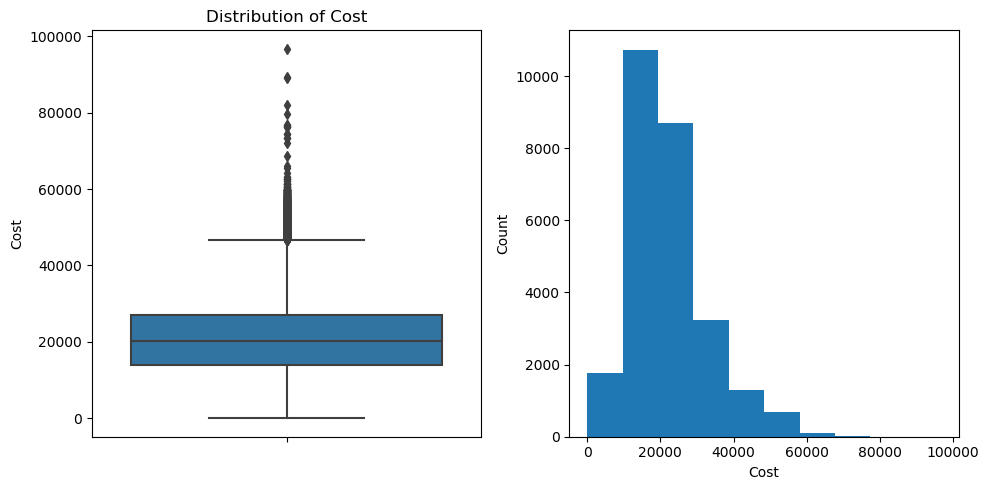

<Figure size 432x288 with 0 Axes>

In [46]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Cost', data=data, orient='v')
plt.title('Distribution of Cost')
#plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['Cost'])
plt.xlabel('Cost')
plt.ylabel('Count')
#plt.yscale('log')
plt.tight_layout()
plt.show()
plt.savefig('figures/CostStats.png',bbox_inches='tight')

### Tuition Revenue

The next column contains the Tuition Revenue per Full-Time equivalent student. According to the data dictionary, this is the net tuition revenue (tuition revenue minus discounts and allowances) divided by the number of FTE students (undergraduates and graduate students). Generally, a full time equivalence is 12 undergraduate credit hours or 6 graduate hours per semester.

In [47]:
print('Null count: ', data['TUITFTE'].isnull().sum()," - ", round(data['TUITFTE'].isnull().sum()/data.shape[0] *100), "%")

zero = data.loc[data['TUITFTE']==0]
print('Schools with 0 TuitionRevenue/FTE', zero.shape[0])

data['TUITFTE'].describe()

Null count:  1553  -  5.0 %
Schools with 0 TuitionRevenue/FTE 83


count    2.913300e+04
mean     9.409252e+03
std      1.247292e+04
min      0.000000e+00
25%      3.756000e+03
50%      8.048000e+03
75%      1.274500e+04
max      1.160056e+06
Name: TUITFTE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


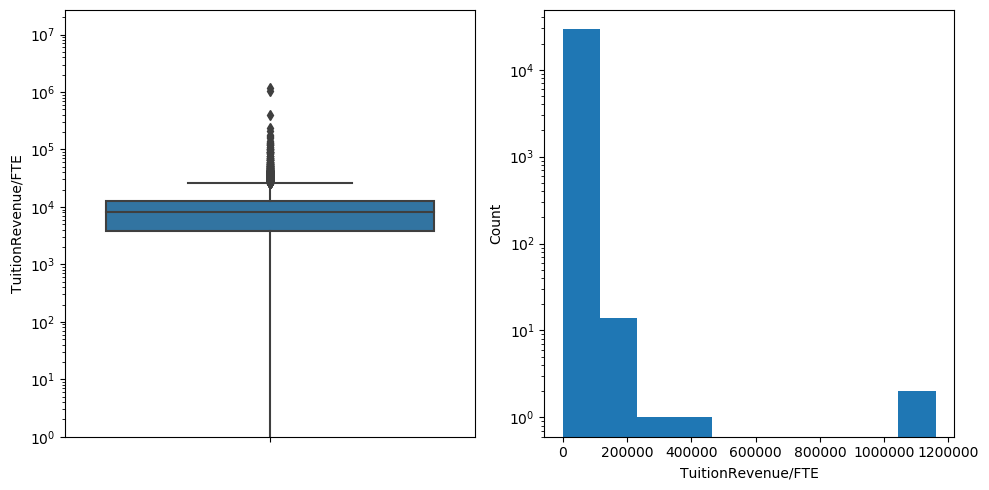

In [48]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('TUITFTE', data=data, orient = 'v')
plt.ylabel('TuitionRevenue/FTE')
plt.yscale('log')
plt.ylim([1, 2.67e+07])

plt.subplot(1, 2, 2)
plt.hist(data['TUITFTE'])
plt.xlabel('TuitionRevenue/FTE')
plt.ylabel('Count')
#plt.xscale('log')
#plt.xlim([1, 10000000])
plt.yscale('log')
plt.tight_layout()
plt.show()

There are 83 schools that report 0 tuition revenue, though 1553 schools have null values. It might be worth binning the Tuition Revenue column into ranges, or groups.

One school seems to have a much higher tuition than the others. Which school is this, and what is their tuition rate?

In [49]:
high_tuition_school = data['TUITFTE'].max()
high_tuition = data.loc[data['TUITFTE']==high_tuition_school]

high_tuition.iloc[0]
high_tuition_name = high_tuition.iloc[0]['INSTNM']
high_tuition_amount = high_tuition.iloc[0]['TUITFTE']

print(high_tuition_name, high_tuition_amount)

columbia college of nursing 1160056.0


In [50]:
# Convert tuition to bins
bins = [0, 1, 2500, 6000, 10000, 30000000]
label = ['none', 'low', 'med', 'high', 'highest']
data['TuitionBins'] = pd.cut(data['TUITFTE'], bins=bins, labels = label)
data.TuitionBins.value_counts()

highest    11203
high        6810
med         6123
low         4914
none           0
Name: TuitionBins, dtype: int64

### Expenditure
Next, is the Expenditure/FTE column which contains "Instructional expenditures divided by the number of FTE students (undergraduates and graduate students) (http://nces.ed.gov/ipeds/glossary/index.asp?id=854)."

In [51]:
print('Null count: ', data['INEXPFTE'].isnull().sum()," - ", round(data['INEXPFTE'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['INEXPFTE']==0]
print('Schools with 0 Expenditure/FTE', zero.shape[0])

data['INEXPFTE'].describe()

Null count:  1553  -  5.0 %
Schools with 0 Expenditure/FTE 38


count     29133.000000
mean       6595.052552
std       10519.012261
min           0.000000
25%        2913.000000
50%        4773.000000
75%        7400.000000
max      606843.000000
Name: INEXPFTE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


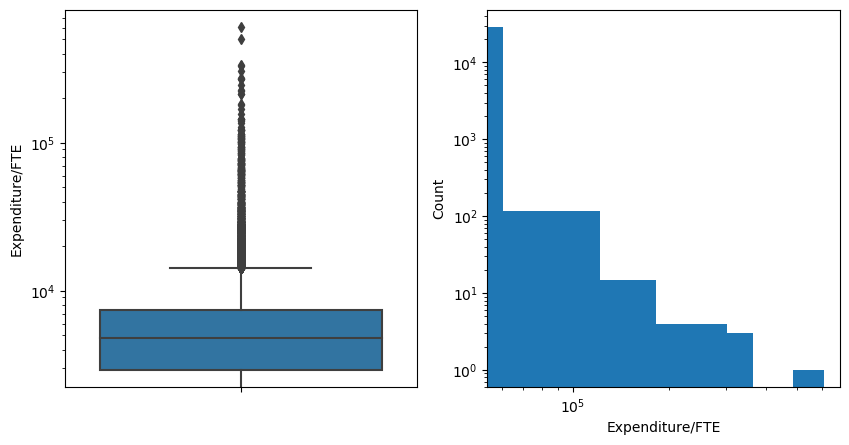

In [52]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('INEXPFTE', data=data, orient='v')
plt.ylabel('Expenditure/FTE')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['INEXPFTE'])
plt.xlabel('Expenditure/FTE')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

What is the school with the max value? It seems to be way higher than even the other high values.

In [53]:
max_expend = data['INEXPFTE'].max()
max_expenditure_school = data.loc[data['INEXPFTE']== max_expend]
#print(max_expenditure_school.Name)
#data.drop(max_expenditure_school.index, inplace=True)

max_expenditure_school.iloc[0]
max_expend_name = max_expenditure_school.iloc[0]['INSTNM']
max_expend_amount = max_expenditure_school.iloc[0]['INEXPFTE']

print(max_expend_name, max_expend_amount)

old town barber college 606843.0


It will be interesting to see if Tuition/Revenue and Expenditure correlate.

In [54]:
# Convert values to bins
data['ExpenditureBins'] = pd.cut(data['INEXPFTE'], bins=bins, labels = label)
data.ExpenditureBins.value_counts()

med        12833
high        6726
low         5580
highest     3956
none           0
Name: ExpenditureBins, dtype: int64

### Admission Rate

The Admission Rate is the "number of admitted undergraduates divided by the number of undergraduates who applied."

In [55]:
print('Null count: ', data['ADM_RATE'].isnull().sum() , " - " , round(data['ADM_RATE'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['ADM_RATE']==0]
print('Schools with 0 Admission Rate', zero.shape[0])

data['ADM_RATE'].describe()

Null count:  21503  -  70.0 %
Schools with 0 Admission Rate 13


count    9183.000000
mean        0.670812
std         0.211303
min         0.000000
25%         0.534500
50%         0.689000
75%         0.825300
max         1.000000
Name: ADM_RATE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


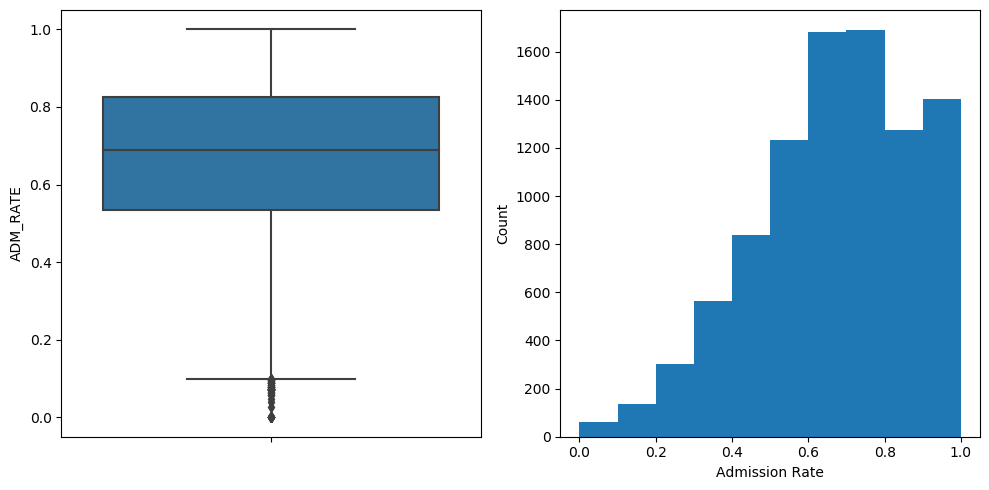

In [56]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('ADM_RATE', data=data, orient='v')

plt.subplot(1, 2, 2)
plt.hist(data['ADM_RATE'])
plt.xlabel('Admission Rate')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Average monthly faculty salary

The next column is Average Faculty Salary per month. According to the data dictionary, it is calculated from the "total salary outlays divided by the number of months worked for all full-time nonmedical instructional staff." 

In [57]:
print('Null count: ', data['AVGFACSAL'].isnull().sum(), " - " , round(data['AVGFACSAL'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['AVGFACSAL']==0]
print('Schools with 0 AvgFaculty Salary', zero.shape[0])

data['AVGFACSAL'].describe()

Null count:  12477  -  41.0 %
Schools with 0 AvgFaculty Salary 0


count    18209.000000
mean      5873.277665
std       2181.700717
min        209.000000
25%       4427.000000
50%       5650.000000
75%       7049.000000
max      24892.000000
Name: AVGFACSAL, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


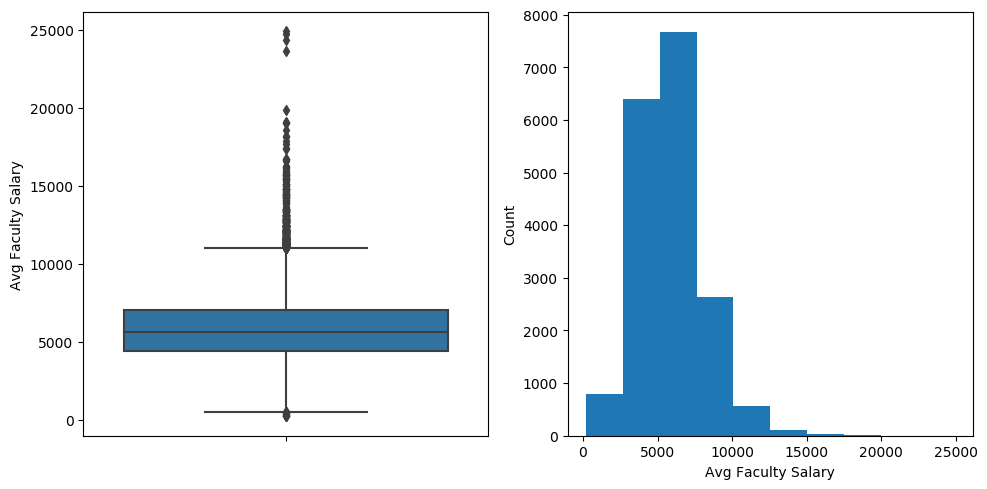

In [58]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('AVGFACSAL', data=data, orient='v')
plt.ylabel('Avg Faculty Salary')

plt.subplot(1, 2, 2)
plt.hist(data['AVGFACSAL'])
plt.xlabel('Avg Faculty Salary')
plt.ylabel('Count')
#plt.xscale('log')
plt.tight_layout()
plt.show()

Given the wide distribution of these values, it might be worth putting them into bins.

It will be interesting to see how faculty salary varies by school type, size, and tuition revenue.

In [59]:
bins = [0, 1, 4000, 6000, 8000, 25000]
data['FacultyBins'] = pd.cut(data['AVGFACSAL'], bins=bins, labels=label)
data.FacultyBins.value_counts()

med        7115
high       5086
low        3319
highest    2689
none          0
Name: FacultyBins, dtype: int64

### Percent fulltime faculty
The next column is the percentage of faculty that are fulltime faculty. The value should be between 0 and 1.

In [60]:
print('Null count: ', data['PFTFAC'].isnull().sum()," - " , round(data['PFTFAC'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['PFTFAC']==0]
print('Schools with 0 Percent Fulltime Faculty', zero.shape[0])

data['PFTFAC'].describe()

Null count:  13489  -  44.0 %
Schools with 0 Percent Fulltime Faculty 53


count    17197.000000
mean         0.541034
std          0.298259
min          0.000000
25%          0.285700
50%          0.500000
75%          0.808500
max          1.000000
Name: PFTFAC, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


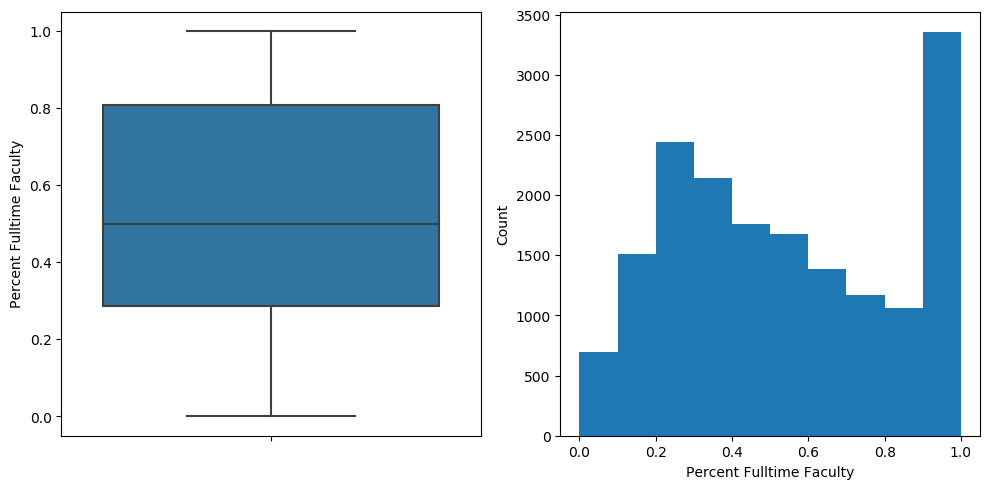

In [61]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('PFTFAC', data=data, orient='v')
plt.ylabel('Percent Fulltime Faculty')

plt.subplot(1, 2, 2)
plt.hist(data['PFTFAC'])
plt.xlabel('Percent Fulltime Faculty')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Proportion of students who complete a degree
The next columns show the proportion of undergraduate students who completed their degree within 150% of the normal time. There is one column for institutions that offer primarily certificate and associate's degree programs, which typically take less than 4 years to complete, and a separate column for 4-year institutions.

There are no rows that have values for both of these columns so I  am going to combine them into one "completion" column.

In [62]:
completion_rate = data[['C150_4', 'C150_L4']]
not_null = completion_rate.notnull()
eitherdf = completion_rate.loc[(not_null['C150_4'])|(not_null['C150_L4'])]
#eitherdf.head()
#completion_rate.head(15)

data['Complete'] = data['C150_4'].combine(data['C150_L4'], take_full)
data = data.drop(['C150_4', 'C150_L4'], axis=1)

print('Null count: ', data.Complete.isnull().sum()," - " , round(data['Complete'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['Complete']==0]
print('Schools with 0 Completion rate', zero.shape[1])

data.Complete.describe()

Null count:  5497  -  18.0 %
Schools with 0 Completion rate 35


count    25189.000000
mean         0.527729
std          0.247866
min          0.000000
25%          0.324100
50%          0.548700
75%          0.722200
max          1.000000
Name: Complete, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


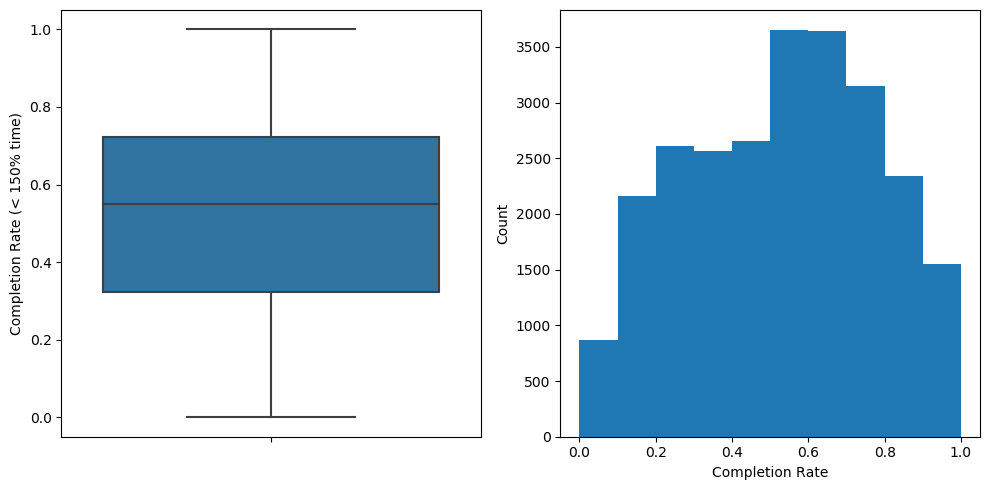

In [63]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Complete', data=data, orient = 'v')
plt.ylabel('Completion Rate (< 150% time)')

plt.subplot(1, 2, 2)
plt.hist(data['Complete'])
plt.xlabel('Completion Rate')
plt.ylabel('Count')
#plt.xscale('log')
plt.tight_layout()
plt.show()

### Retention Rates
According to the data documentation, "retention rate identifies (separately) the share of full-time and part-time students in the prior year, at four-year (RET_FT4 and RET_PT4) and less-than-four- year institutions (RET_FTL4 and RET_PTL4), who return to the institution after the first year. For four-year institutions, the retention rate covers bachelor’s degree-seeking students only; at less-than-four-year institutions, it covers all degree/certificate-seeking students."

In [64]:
retention = data[['RET_FT4','RET_FTL4','RET_PT4','RET_PTL4']]
not_null = retention.notnull()
fulltimedf = retention.loc[(not_null['RET_FT4'])|(not_null['RET_FTL4'])]

print(fulltimedf.head())

partimedf = retention.loc[(not_null['RET_PT4'])|(not_null['RET_PTL4'])]
print(partimedf.tail())

   RET_FT4  RET_FTL4  RET_PT4  RET_PTL4
0   0.7457       NaN   0.5000       NaN
1   0.7997       NaN   0.7000       NaN
2   0.8000       NaN      NaN       NaN
3   0.7545       NaN   0.5385       NaN
4   0.6352       NaN   0.4167       NaN
       RET_FT4  RET_FTL4  RET_PT4  RET_PTL4
30260      NaN    0.4649      NaN    0.5679
30261      NaN    0.8519      NaN    0.8462
30262      NaN    0.8929      NaN    0.8750
30263   0.7158       NaN   0.6343       NaN
30264      NaN    0.4314      NaN    0.2609


In [65]:
# Combine Retention columns
data['RetentionFT'] = data['RET_FT4'].combine(data['RET_FTL4'], take_full)
data['RetentionPT'] = data['RET_PT4'].combine(data['RET_PTL4'], take_full)
data = data.drop(['RET_FT4','RET_FTL4','RET_PT4','RET_PTL4'], axis=1)

print('Null count: ', data.RetentionFT.isnull().sum(), " - " , round(data['RetentionFT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['RetentionFT']==0]
print('Schools with 0 Completion rate - Full Time:', zero.shape[0])

print('Null count: ', data.RetentionPT.isnull().sum(), " - " , round(data['RetentionPT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['RetentionPT']==0]
print('Schools with 0 Completion rate - Part Time:', zero.shape[0])
#print(zero.head())

data[['RetentionFT', 'RetentionPT']].describe()

Null count:  5651  -  18.0 %
Schools with 0 Completion rate - Full Time: 225
Null count:  15600  -  51.0 %
Schools with 0 Completion rate - Part Time: 1107


RetentionFT   RetentionPT
count  25035.000000  15086.000000
mean       0.686603      0.514609
std        0.183634      0.274843
min        0.000000      0.000000
25%        0.576900      0.336850
50%        0.702100      0.491050
75%        0.816900      0.714300
max        1.000000      1.000000

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


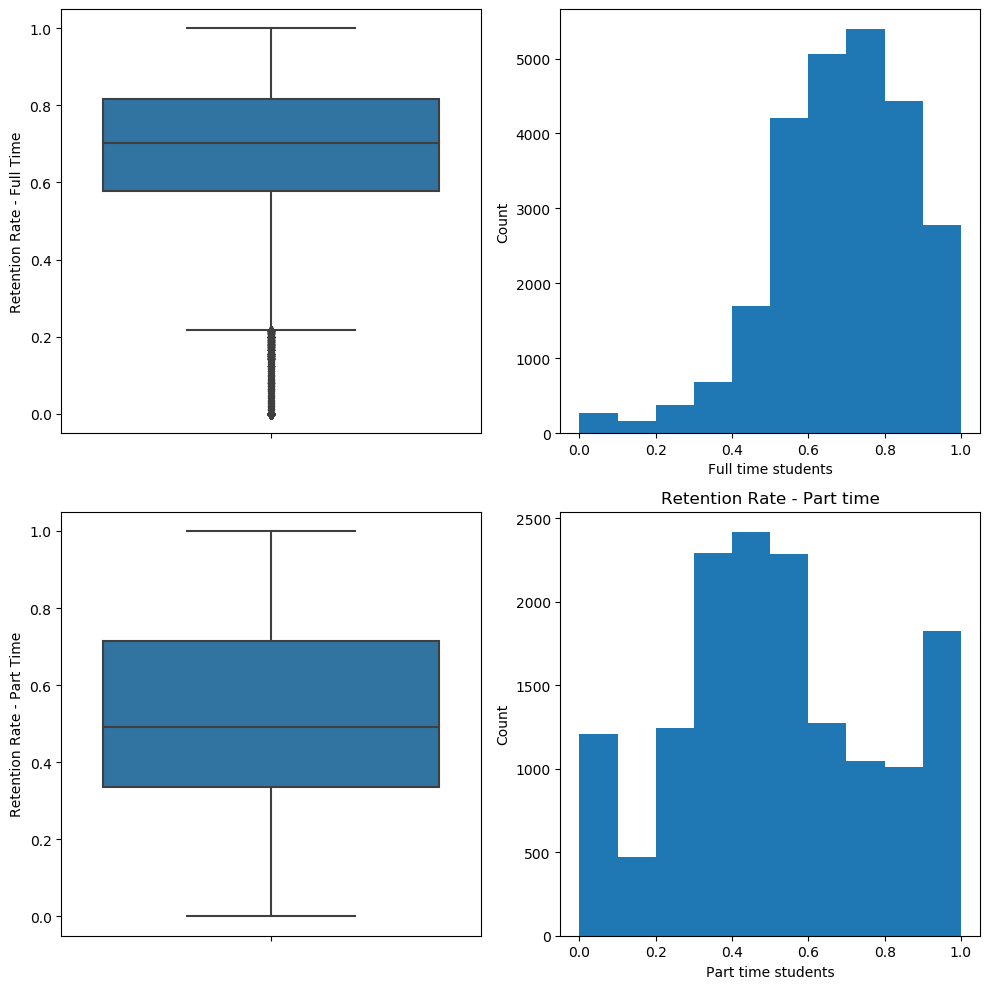

In [66]:
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
sns.boxplot('RetentionFT', data=data, orient = 'v')
plt.ylabel('Retention Rate - Full Time')

plt.subplot(2, 2, 2)
plt.hist(data['RetentionFT'])
plt.xlabel('Full time students')
plt.ylabel('Count')
plt.title('')

plt.subplot(2, 2, 3)
sns.boxplot('RetentionPT', data=data, orient = 'v')
plt.ylabel('Retention Rate - Part Time')

plt.subplot(2, 2, 4)
plt.hist(data['RetentionPT'])
plt.xlabel('Part time students')
plt.ylabel('Count')
plt.title('Retention Rate - Part time')
plt.tight_layout()
plt.show()

### Percent Completed, Withdrawn and Still Enrolled at the original institution after 4 years

In [67]:
print('Null count, completed: ', data['COMP_ORIG_YR4_RT'].isnull().sum(), " - " , round(data['COMP_ORIG_YR4_RT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['COMP_ORIG_YR4_RT']==0]
print('Schools with 0 PercentCompleted4yr', zero.shape[0])

print('Null count, withdrawn: ', data['WDRAW_ORIG_YR4_RT'].isnull().sum(), " - " , round(data['WDRAW_ORIG_YR4_RT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['WDRAW_ORIG_YR4_RT']==0]
print('Schools with 0 PercentWithdraw4yr', zero.shape[0])

print('Null count, enrolled: ', data['ENRL_ORIG_YR4_RT'].isnull().sum(), " - " , round(data['ENRL_ORIG_YR4_RT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['ENRL_ORIG_YR4_RT']==0]
print('Schools with 0 PercentEnrolled4yr', zero.shape[0])

data[['COMP_ORIG_YR4_RT', 'WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT']].describe()

Null count, completed:  11883  -  39.0 %
Schools with 0 PercentCompleted4yr 668
Null count, withdrawn:  12649  -  41.0 %
Schools with 0 PercentWithdraw4yr 1918
Null count, enrolled:  15002  -  49.0 %
Schools with 0 PercentEnrolled4yr 6687


COMP_ORIG_YR4_RT  WDRAW_ORIG_YR4_RT  ENRL_ORIG_YR4_RT
count      18803.000000       18037.000000      15684.000000
mean           0.412910           0.200394          0.034990
std            0.235734           0.126550          0.046310
min            0.000000           0.000000          0.000000
25%            0.207888           0.113043          0.000000
50%            0.418182           0.191406          0.021098
75%            0.606361           0.284722          0.057930
max            1.000000           0.737864          0.758621

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


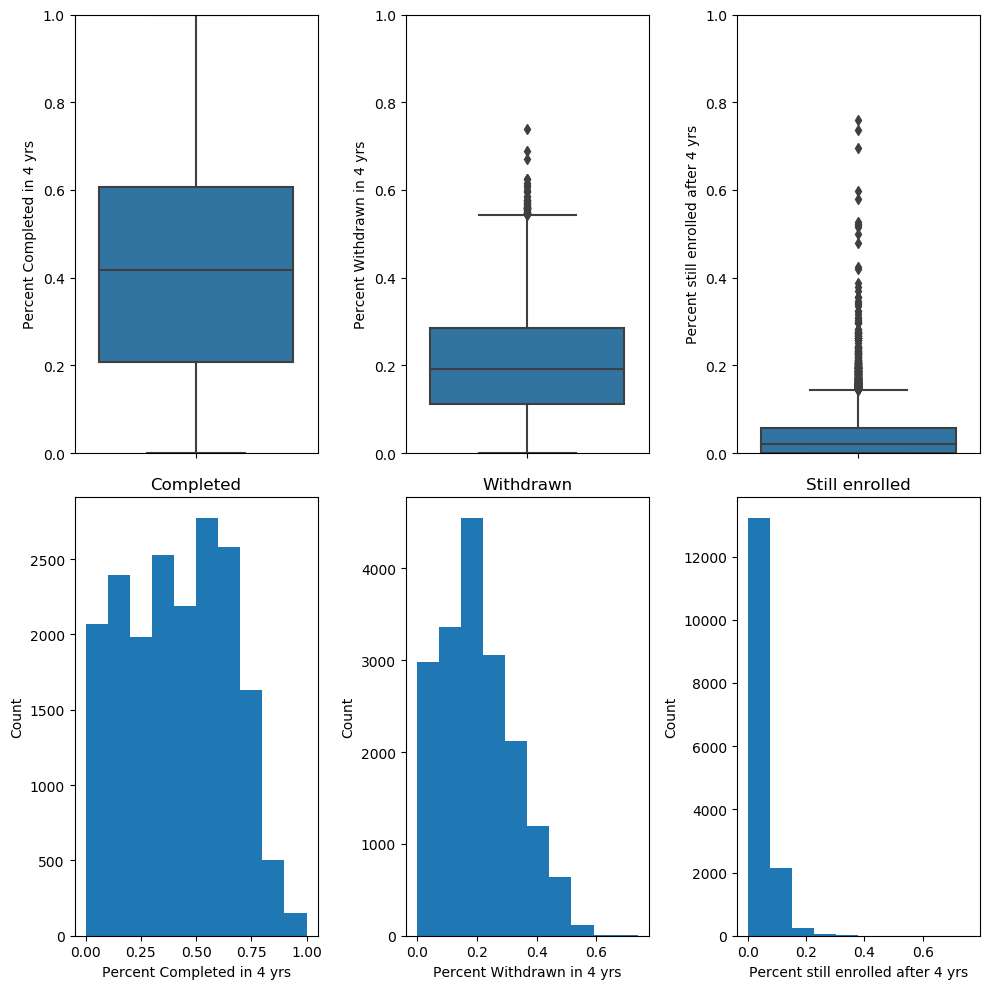

In [68]:
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2, 3, 1)
sns.boxplot('COMP_ORIG_YR4_RT', data=data, orient = 'v')
plt.ylabel('Percent Completed in 4 yrs')
plt.ylim(0, 1)

plt.subplot(2, 3, 4)
plt.hist(data['COMP_ORIG_YR4_RT'])
plt.xlabel('Percent Completed in 4 yrs')
plt.ylabel('Count')
plt.title('Completed')

plt.subplot(2, 3, 2)
sns.boxplot('WDRAW_ORIG_YR4_RT', data=data, orient = 'v')
plt.ylabel('Percent Withdrawn in 4 yrs')
plt.ylim(0, 1)

plt.subplot(2, 3, 5)
plt.hist(data['WDRAW_ORIG_YR4_RT'])
plt.xlabel('Percent Withdrawn in 4 yrs')
plt.ylabel('Count')
plt.title('Withdrawn')

plt.subplot(2, 3, 3)
sns.boxplot('ENRL_ORIG_YR4_RT', data=data, orient = 'v')
plt.ylabel('Percent still enrolled after 4 yrs')
plt.ylim(0, 1)

plt.subplot(2, 3, 6)
plt.hist(data['ENRL_ORIG_YR4_RT'])
plt.xlabel('Percent still enrolled after 4 yrs')
plt.ylabel('Count')
plt.title('Still enrolled')
plt.tight_layout()
plt.show()

### Median debt amount

In [69]:
print('Null count: ', data['DEBT_MDN'].isnull().sum()," - " , round(data['DEBT_MDN'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['DEBT_MDN']==0]
print('Schools with 0 Median debt:', zero.shape[0])

data['DEBT_MDN'].describe()

Null count:  4494  -  15.0 %
Schools with 0 Median debt: 0


count     26192.000000
mean      11292.005822
std        5407.575492
min         124.000000
25%        7460.000000
50%        9500.000000
75%       14847.000000
max      131335.000000
Name: DEBT_MDN, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


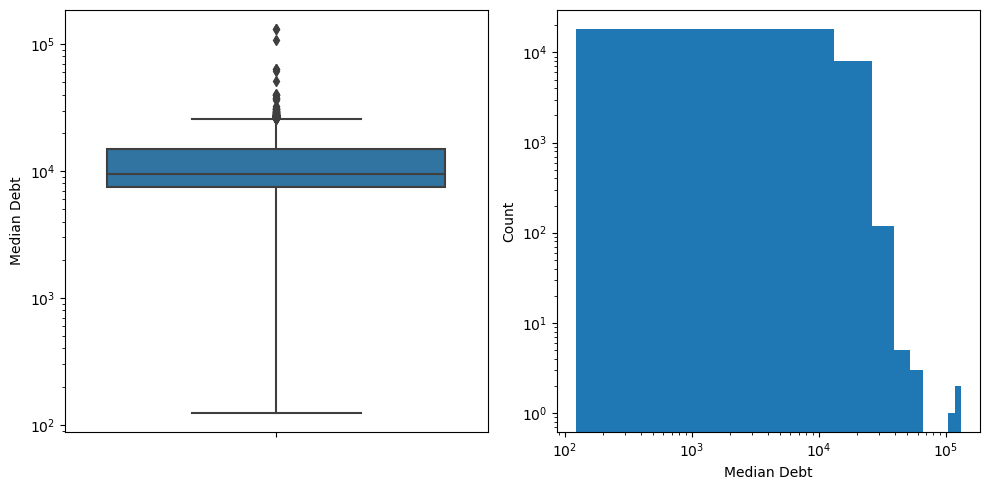

In [70]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('DEBT_MDN', data=data, orient='v')
plt.ylabel('Median Debt')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['DEBT_MDN'])
plt.xlabel('Median Debt')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

### Students above 25 years of age

In [71]:
print('Null count: ', data['UG25abv'].isnull().sum()," - " , round(data['UG25abv'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['UG25abv']==0]
print('Schools with 0 Students > 25:', zero.shape[0])

data['UG25abv'].describe()

Null count:  16653  -  54.0 %
Schools with 0 Students > 25: 0


count    14033.000000
mean         0.425814
std          0.226099
min          0.000500
25%          0.261800
50%          0.422800
75%          0.589700
max          1.000000
Name: UG25abv, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


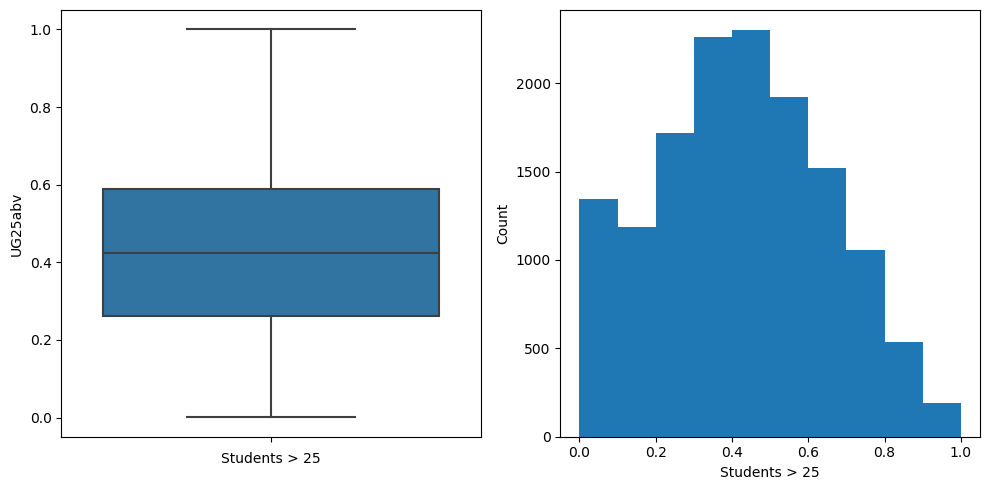

In [72]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('UG25abv', data=data, orient='v')
plt.xlabel('Students > 25')

plt.subplot(1, 2, 2)
plt.hist(data['UG25abv'])
plt.xlabel('Students > 25')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Percent of students who took out a federal loan.

The column reports the "proportion of undergraduates who received a federal loan in the academic year...", expressed as a decimal, so the values should be between 0 and 1.

In [73]:
print('Null count: ', data['PCTFLOAN'].isnull().sum()," - " , round(data['PCTFLOAN'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['PCTFLOAN']==0]
print('Schools with 0 Federal Loan:', zero.shape[0])

data['PCTFLOAN'].describe()

Null count:  2799  -  9.0 %
Schools with 0 Federal Loan: 2812


count    27887.000000
mean         0.531217
std          0.295645
min          0.000000
25%          0.319150
50%          0.596200
75%          0.766550
max          1.000000
Name: PCTFLOAN, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


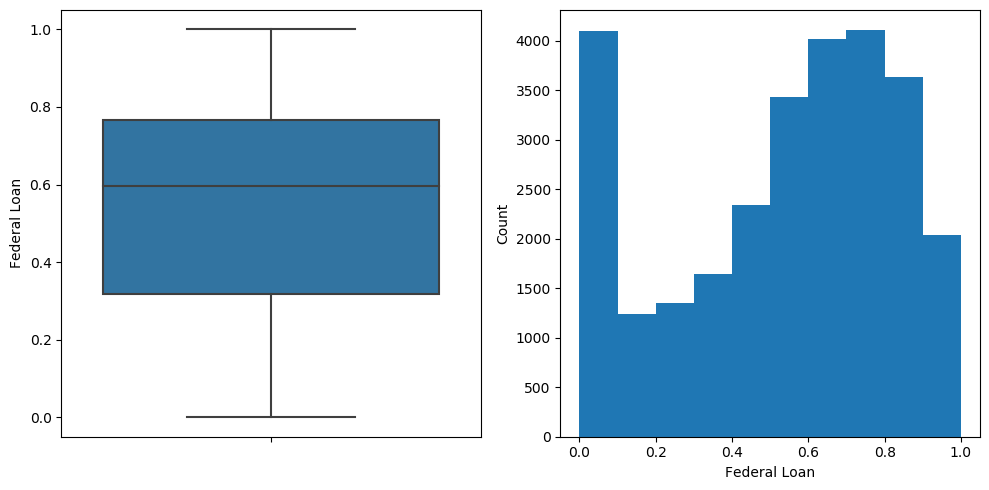

In [74]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('PCTFLOAN', data=data, orient='v')
plt.ylabel('Federal Loan')

plt.subplot(1, 2, 2)
plt.hist(data['PCTFLOAN'])
plt.xlabel('Federal Loan')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [75]:
highloan = data['PCTFLOAN'].max()
highloan_school = data.loc[data['PCTFLOAN']== highloan]
print(highloan_school.INSTNM)
data.loc[highloan_school.index, 'PCTFLOAN'] = 1

204                                alameda beauty college
655                   intellitec college-colorado springs
808                                 ati college of health
1290                        j everett light career center
1451                              old town barber college
                               ...                       
29992         tomorrow's image barber academy of virginia
30082                           fortis college-cutler bay
30184                     empire beauty school-stone park
30186                san joaquin valley college-lancaster
30199    college of business and technology-miami gardens
Name: INSTNM, Length: 239, dtype: object


##  Explore the CURROPER column
- How many schools are open vs closed?
- What percentage of schools are open vs closed?
- How does this relate to control?

In [76]:
# How many schools are closed?
num_open = data['CURROPER'].sum()
print('Open:  ', num_open)

closed = data.loc[data['CURROPER']==False]
print('Closed:  ', closed.shape[0])

Open:   27927
Closed:   2759


In [77]:
#How many schools are closed by OPEID?
closed.OPEID.value_counts()

02133100    1
00722900    1
02180600    1
02239200    1
00940701    1
           ..
00966500    1
00747700    1
03195400    1
02593100    1
00748801    1
Name: OPEID, Length: 932, dtype: int64

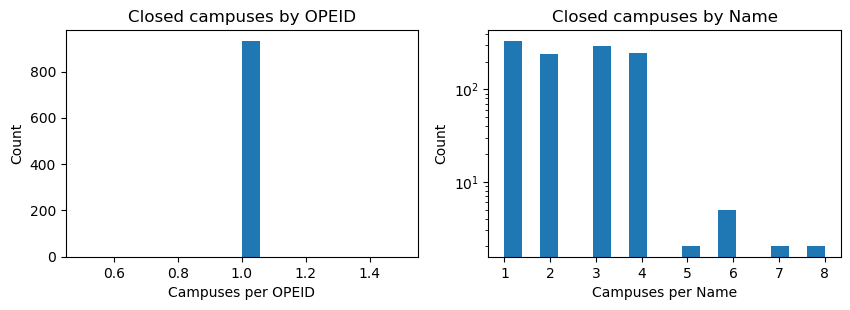

In [78]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.hist(closed.OPEID.value_counts(), bins=18)
plt.xlabel('Campuses per OPEID')
plt.ylabel('Count')
plt.title('Closed campuses by OPEID')

plt.subplot(1, 2, 2)
plt.hist(closed.INSTNM.value_counts(), bins=18)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Campuses per Name')
plt.ylabel('Count')
plt.title('Closed campuses by Name')
plt.tight_layout
#plt.show()
plt.savefig('figures/ClosedOPEIDNameHist.png',bbox_inches='tight')

In [79]:
closed.INSTNM.value_counts()

daymar college-louisville                              8
international beauty school                            8
everest college-arlington                              7
central florida institute                              7
kaplan college-indianapolis                            6
                                                      ..
university of phoenix-delaware                         1
chambersburg beauty school                             1
westwood college-arlington ballston                    1
connecticut training centers inc                       1
destination academy for spa and salon professionals    1
Name: INSTNM, Length: 1132, dtype: int64

In [80]:
# control_cat = closed['CONTROL'].astype('str')
# control_cat = control_cat.reset_index(drop = True)

# for i in range(len(control_cat)):
#     val = control_cat[i]
#     cat = control_type[val]
#     control_cat[i] = cat

print(closed.CONTROL_N.value_counts())
print('There are ', closed.CONTROL_N.isnull().sum(), 'null values.')

Private for-profit    2217
Private nonprofit      342
Public                 200
Name: CONTROL_N, dtype: int64
There are  0 null values.


In [81]:
#predom_degree = {'0':'Not classified', '1':'Certificate', '2':'Associates', '3':'Bachelor', '4':'Graduate'}
pred_deg = closed['PREDDEG'].astype('str')
pred_deg = pred_deg.reset_index(drop=True)

for i in range(len(pred_deg)):
    val = pred_deg[i]
    cat = predom_degree[val]
    pred_deg[i] = cat

pred_deg.value_counts()
#closed['Primary degree type'].value_counts()

Certificate       1841
Associates         325
Not classified     253
Bachelor           241
Graduate            99
Name: PREDDEG, dtype: int64

In [82]:
closedControl = closed.pivot_table(index='PREDDEG_N', columns='CONTROL_N', aggfunc='size')
print(closedControl)

#print(control_type)

CONTROL_N       Private for-profit  Private nonprofit  Public
PREDDEG_N                                                    
Associates                     257                 26      42
Bachelor                       134                 94      13
Certificate                   1577                147     117
Graduate                        58                 40       1
Not classified                 191                 35      27


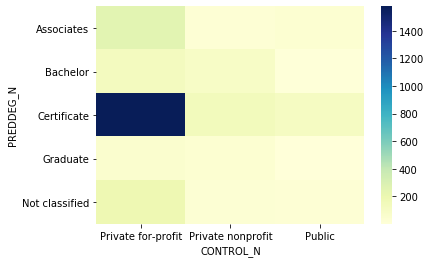

In [83]:
sns.heatmap(closedControl, cmap='YlGnBu')
plt.savefig('figures/PreddegControlHeatmap.png',bbox_inches='tight')

The largest group of closed schools (5641, or 48.8%) are private, for-profit, primarily certificate-granting institutions. The next largest category (1573, or 13.6%) are private, for-profit associates-granting institutions.

## Bivariate exploration
### College enrollment
How does college enrollment correlate with school type, tuition revenue, expenditure, and operating status?

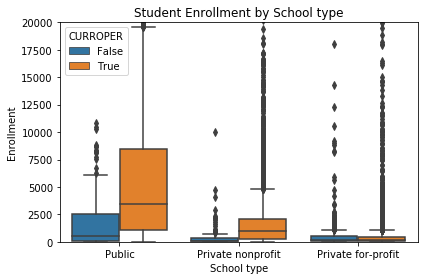

In [84]:
# fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# sns.boxplot('CONTROL_N', 'UGDS', data=data, hue = 'CURROPER')
# plt.title('Student Enrollment by School type')
# plt.xlabel('School type')
# plt.ylabel('Enrollment')

# plt.subplot(1, 2, 2)
sns.boxplot('CONTROL_N', 'UGDS', data=data, hue = 'CURROPER')
plt.title('Student Enrollment by School type')
plt.ylim((0,20000))
plt.xlabel('School type')
plt.ylabel('Enrollment')
plt.tight_layout()
#plt.show()
plt.savefig('figures/UGDSControlBox.png',bbox_inches='tight')

In [85]:
high_enrollment = data.loc[data['UGDS']>100000]
print(high_enrollment.CONTROL.value_counts())
data.drop(high_enrollment.index, inplace=True)

3    4
2    0
1    0
Name: CONTROL, dtype: int64


The schools with the highest enrollment, in fact, the 4 schools with more than 100,000 students, are all private for-profit schools. Zooming in on the plot to include just schools with less than 10,000 students gives a more detailed view of the bulk of the data.

Private for-profit schools can have much higher enrollments than the other two types of schools. Interestingly, some of the closed for-profit schools have really high enrollments.

Currently operating public schools have the highest median enrollment.

Given the high number of values outside the IQR range for all three school types it seems like binning the values for enrollment would make sense. - How do I decide what range of bins to use?

For the time being, I am going to exclude schools with Enrollment over 100,000 from the analysis.

In [86]:
EnrollmentBin = data.pivot_table(index='EnrollmentBins', columns='CONTROL', aggfunc='size')
EnrollmentBin

CONTROL            1     2     3
EnrollmentBins                  
none               1     5     2
small            768  1234  5774
medium           633  1134  4503
large           1565  2477  2810
xl              5040  1680   428

### Enrollment vs Tuition Revenue

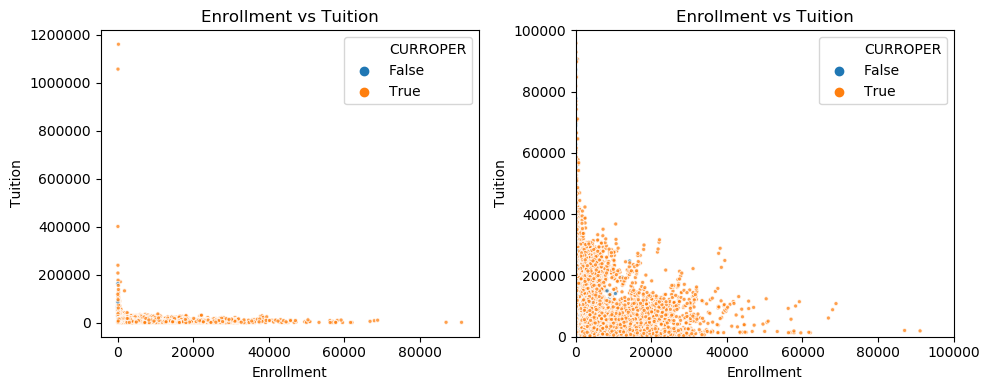

In [87]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.title('Enrollment vs Tuition')

plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Enrollment vs Tuition')
plt.tight_layout()
#plt.show()

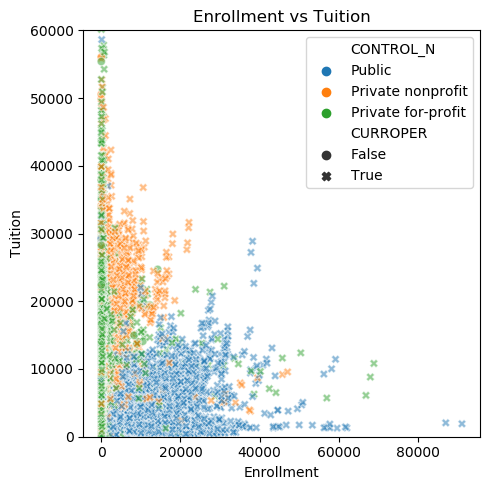

In [88]:
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CONTROL_N', marker='.', alpha=0.75)
# plt.xlabel('Enrollment')
# plt.ylabel('Tuition')
# plt.title('Enrollment vs Tuition')

# plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CONTROL_N', style='CURROPER', alpha=0.5)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
#plt.xlim(0, 100000)
plt.ylim(0, 60000)
plt.title('Enrollment vs Tuition')
plt.tight_layout()
#plt.show()
plt.savefig('figures/EnrollmentTuitionControl.png',bbox_inches='tight')

(0, 500000)

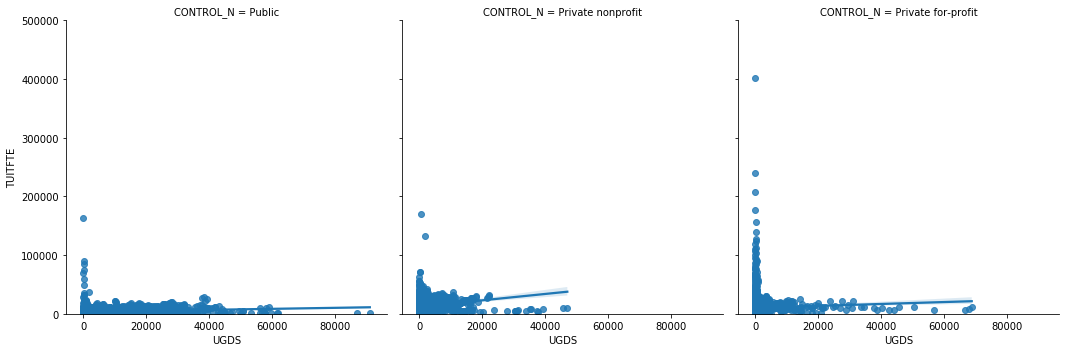

In [89]:
sns.lmplot( x='UGDS', y='TUITFTE', data=data , col='CONTROL_N')
plt.ylim(0, 500000)

It appears that the schools with the highest enrollment AND lowest tuition are mostly public schools, and the schools with lowest enrollment and highest tuition are private nonprofit schools, with several private for-profit schools mixed in.

Text(0.5, 1.0, 'Enrollment (binned) vs Tuition Revenue')

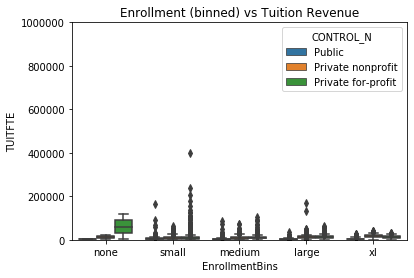

In [90]:
# Try to plot the Enrollment bins
sns.boxplot('EnrollmentBins', 'TUITFTE', hue='CONTROL_N', data=data)
plt.ylim(0, 1000000)
plt.title('Enrollment (binned) vs Tuition Revenue')

### Enrollment vs Expenditure

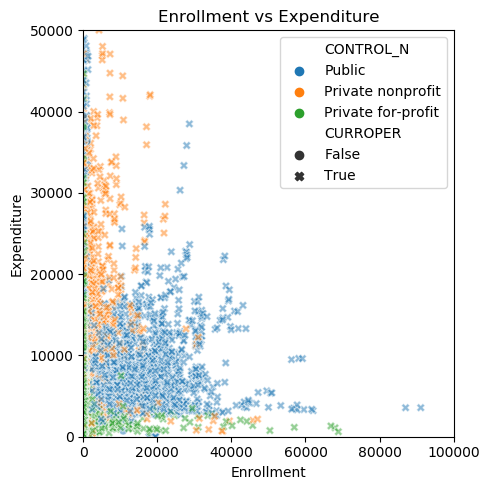

In [91]:
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# sns.scatterplot('UGDS', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Enrollment')
# plt.ylabel('Expenditure')
# plt.xlim(0, 100000)
# plt.ylim(0, 50000)
# plt.title('Enrollment vs Expenditure')

# plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'INEXPFTE', data=data, hue='CONTROL_N', style='CURROPER', alpha=0.5)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 50000)
plt.title('Enrollment vs Expenditure')
plt.tight_layout()
#plt.show()
plt.savefig('figures/EnrollmentExpenditureControl.png',bbox_inches='tight')

(0, 100000)

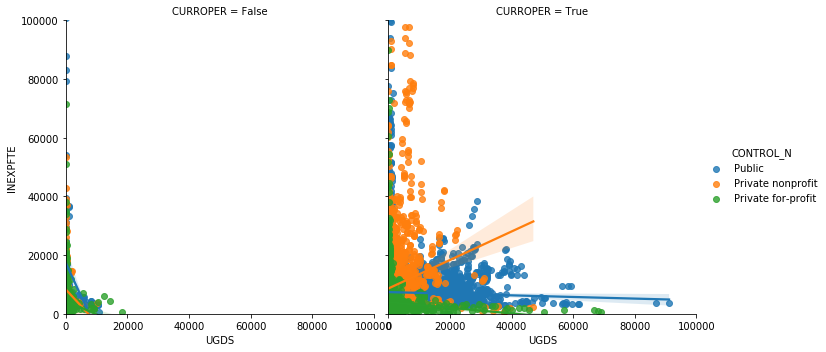

In [92]:
sns.lmplot( x='UGDS', y='INEXPFTE', data=data , hue='CONTROL_N', col='CURROPER')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
#plt.ylim(0, 2000000)

Private for-profit schools generally have the lowest expenditure, regardless of enrollment, while private nonprofit schools have gnerally higher expenditures and lower enrollments. Levels of expenditure and school control type are explored more below.

### Tuition and Expenditure
How does tuition revenue correlate with expenditure, school type and operating status?

In [93]:
data['TUITFTE'].groupby(data['CONTROL']).mean()

CONTROL
1     3952.815327
2    13482.291084
3    10380.947283
Name: TUITFTE, dtype: float64

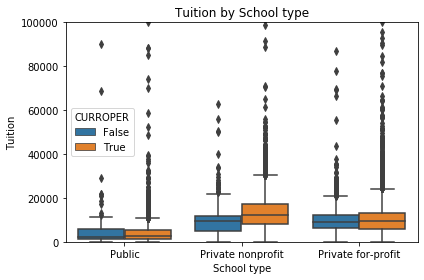

In [94]:
# fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# sns.boxplot('CONTROL_N', 'TUITFTE', data=data, hue = 'CURROPER')
# plt.title('Boxplots of Tuition by School type')
# plt.ylabel('Tuition')
# plt.xlabel('School type')

# plt.subplot(1, 2, 2)
sns.boxplot('CONTROL_N', 'TUITFTE', data=data, hue = 'CURROPER')
plt.title('Tuition by School type')
plt.ylim(0, 100000)
plt.ylabel('Tuition')
plt.xlabel('School type')
plt.tight_layout()
#plt.show()
plt.savefig('figures/TuitonControlBox.png',bbox_inches='tight')

Public schools have the lowest mean tuition, while private for profit schools have the highest mean tuition, and private non-profit schools have the highest median tuition.

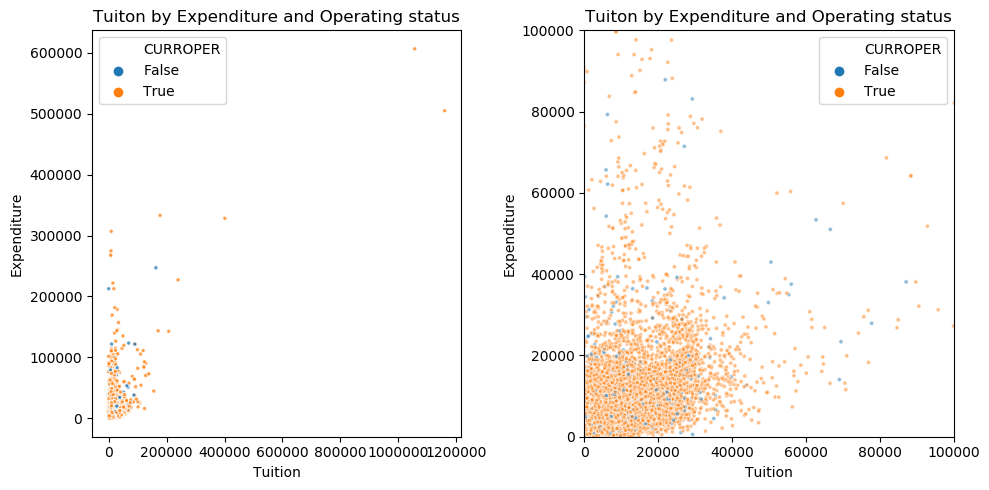

In [95]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.title('Tuiton by Expenditure and Operating status')

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and Operating status')
plt.tight_layout()
#plt.show()

I thought that perhaps tuition and expenditure would correlate - especially for the schools with the highest tuition and the highest expenditure. While there may be a correlation between tuition and expenditure in general, the schools with the highest expenditure are not the schools with the highest tuition, and vice versa.

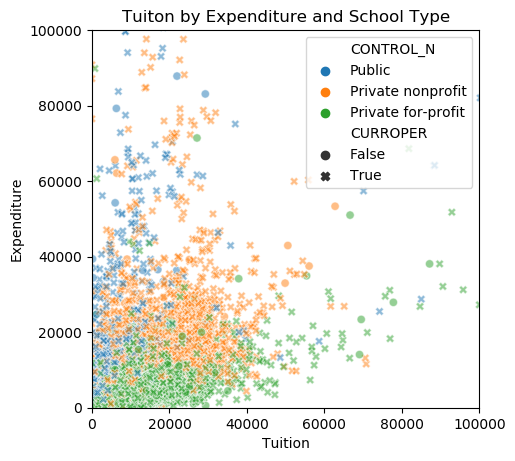

In [96]:
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.5)
# plt.xlabel('Tuition')
# plt.ylabel('Expenditure')
# plt.xlim(0, 100000)
# plt.ylim(0, 100000)
# plt.title('Tuiton by Expenditure and Operating status')

# sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CONTROL_N', marker='.', alpha=0.75)
# plt.xlabel('Tuition')
# plt.ylabel('Expenditure')
# plt.title('Tuiton by Expenditure and School Type')

#plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CONTROL_N', style='CURROPER', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and School Type')
#plt.tight_layout()
#plt.show()
plt.savefig('figures/TuitionExpenditureControl.png',bbox_inches='tight')

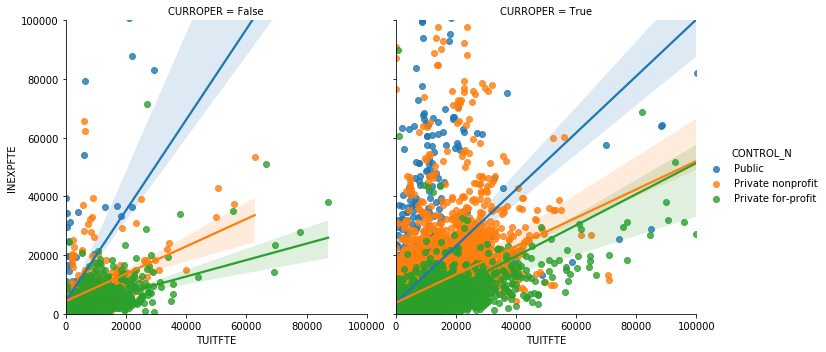

In [97]:
sns.lmplot( x='TUITFTE', y='INEXPFTE', data=data , hue='CONTROL_N', col='CURROPER')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.show()

In [98]:
data['INEXPFTE'].groupby(data['CONTROL']).mean()

CONTROL
1     7588.634393
2    10272.361455
3     3981.709874
Name: INEXPFTE, dtype: float64

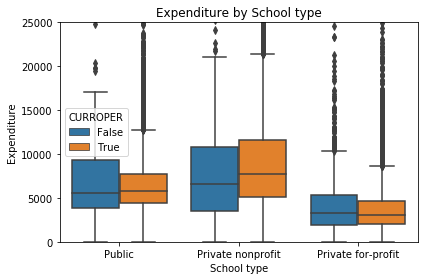

In [99]:
# fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# sns.boxplot('CONTROL_N', 'INEXPFTE', data=data, hue = 'CURROPER')
# plt.title('Expenditure by School type')
# plt.ylabel('Expenditure')
# plt.xlabel('School type')
# #plt.ylim(0, 10000000)

# plt.subplot(1, 2, 2)
sns.boxplot('CONTROL_N', 'INEXPFTE', data=data, hue = 'CURROPER')
plt.title('Expenditure by School type')
plt.ylabel('Expenditure')
plt.xlabel('School type')
plt.ylim((0,25000))
plt.tight_layout()
#plt.show()

Public schools have the highest mean expenditures, and more public schools with really high expenditure levels, but the median private nonprofit school spends more on students than the other two types of schools. Private for-profit schools have the lowest expenditure levels.

## Net Price and Cost

In [100]:
# Enrollment vs Net Price
# How does enrollment relate to Net Price?
#How does Net Price correlate with expenditure, school type and operating status?
print(data['NetPrice'].groupby(data['CONTROL']).mean())
print(data['Cost'].groupby(data['CONTROL']).mean())

CONTROL
1     8967.824096
2    19174.320781
3    17072.000188
Name: NetPrice, dtype: float64
CONTROL
1    14074.276186
2    32018.335087
3    22065.236229
Name: Cost, dtype: float64


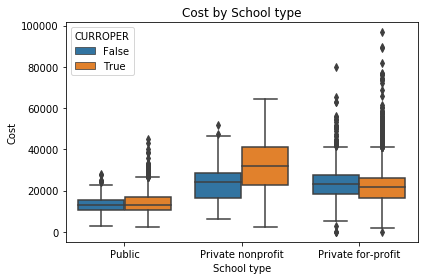

In [101]:
#fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# sns.boxplot('CONTROL', 'NetPrice', data=data, hue = 'CURROPER')
# plt.title('Boxplots of NetPrice by School type')
# plt.ylabel('NetPrice')
# plt.xlabel('School type')

# plt.subplot(1, 2, 2)
sns.boxplot('CONTROL_N', 'Cost', data=data, hue = 'CURROPER')
plt.title('Cost by School type')
plt.ylabel('Cost')
plt.xlabel('School type')
plt.tight_layout()
#plt.show()
plt.savefig('figures/PriceControlBox.png',bbox_inches='tight')

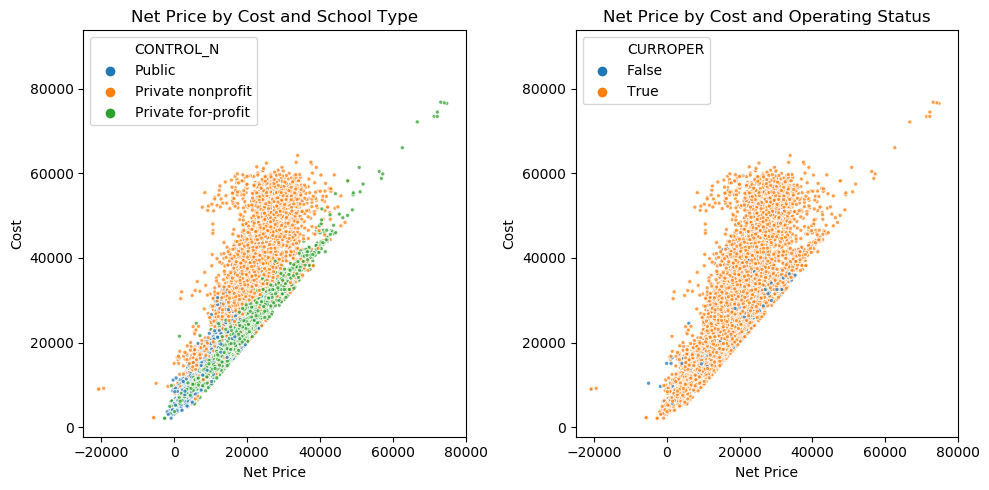

In [102]:
# Net Price vs Cost
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('NetPrice', 'Cost', data=data, hue='CONTROL_N', marker='.', alpha=0.75)
plt.xlabel('Net Price')
plt.ylabel('Cost')
plt.xlim([-25000, 80000])
plt.title('Net Price by Cost and School Type')

plt.subplot(1, 2, 2)
sns.scatterplot('NetPrice', 'Cost', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Net Price')
plt.ylabel('Cost')
plt.xlim([-25000, 80000])
plt.title('Net Price by Cost and Operating Status')

plt.tight_layout()
#plt.show()
#plt.savefig('figures/NetPriceCostControl.png',bbox_inches='tight')

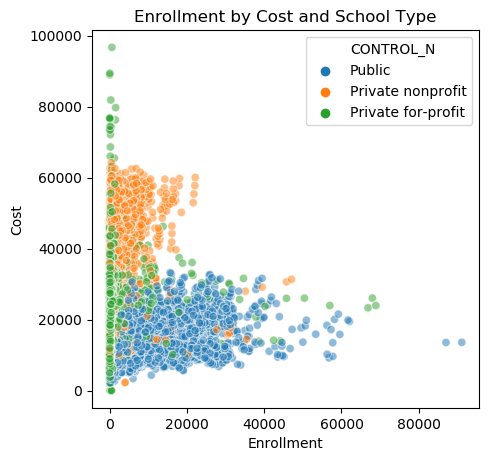

In [103]:
# Enrollment vs Net Price and Cost
fig=plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
#plt.subplot(2, 2, 1)
# sns.scatterplot('UGDS', 'NetPrice', data=data, hue='CONTROL', marker='.', alpha=0.75)
# plt.xlabel('Enrollment')
# plt.ylabel('Net Price')
# plt.ylim([-25000, 80000])
# plt.title('Enrollment by Net Price and School Type')

#plt.subplot(2, 2, 2)
sns.scatterplot('UGDS', 'Cost', data=data, hue='CONTROL_N', alpha=0.5) #style='CURROPER',
plt.xlabel('Enrollment')
plt.ylabel('Cost')
#plt.xlim([-25000, 80000])
plt.title('Enrollment by Cost and School Type')

# plt.subplot(2, 2, 3)
# sns.scatterplot('UGDS', 'NetPrice', data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Enrollment')
# plt.ylabel('Net Price')
# plt.ylim([-25000, 80000])
# plt.title('Enrollment by Net Price and Operating Status')

# plt.subplot(2, 2, 1)
# sns.scatterplot('UGDS', 'Cost', data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Enrollment')
# plt.ylabel('Cost')
# #plt.xlim([-25000, 80000])
# plt.title('Enrollment by Cost and Operating Status')

# plt.tight_layout()
#plt.show()
plt.savefig('figures/EnrollmentPriceControl.png',bbox_inches='tight')

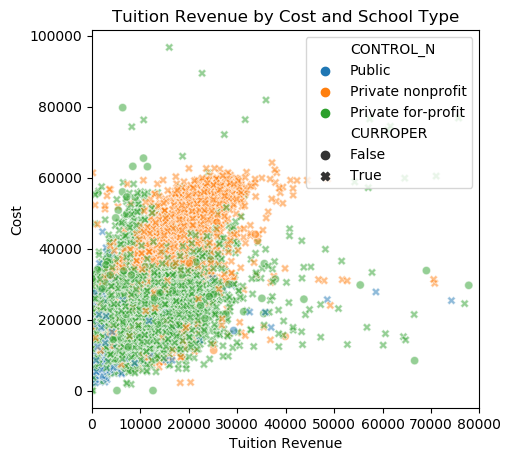

In [104]:
# Tuition vs Net Price
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(2, 2, 1)
# sns.scatterplot('TUITFTE', 'NetPrice', data=data, hue='CONTROL', marker='.', alpha=0.75)
# plt.xlabel('Tuition Revenue')
# plt.ylabel('Net Price')
# plt.ylim([-25000, 80000])
# plt.title('Tuition Revenue by Net Price and School Type')

#plt.subplot(2, 2, 2)
sns.scatterplot('TUITFTE', 'Cost', data=data, hue='CONTROL_N', style='CURROPER', alpha=0.5)
plt.xlabel('Tuition Revenue')
plt.ylabel('Cost')
plt.xlim([0, 80000])
plt.title('Tuition Revenue by Cost and School Type')

# plt.subplot(2, 2, 3)
# sns.scatterplot('TUITFTE', 'NetPrice', data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Tuition Revenue')
# plt.ylabel('Net Price')
# plt.ylim([-25000, 80000])
# plt.title('Tuition Revenue by Net Price and Operating Status')

# plt.subplot(2, 2, 1)
# sns.scatterplot('TUITFTE', 'Cost', data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Tuition Revenue')
# plt.ylabel('Cost')
# plt.xlim([0, 80000])
# plt.title('Tuition Revenue by Cost and Operating Status')

# plt.tight_layout()
#plt.show()
plt.savefig('figures/TuitionPrice.png',bbox_inches='tight')

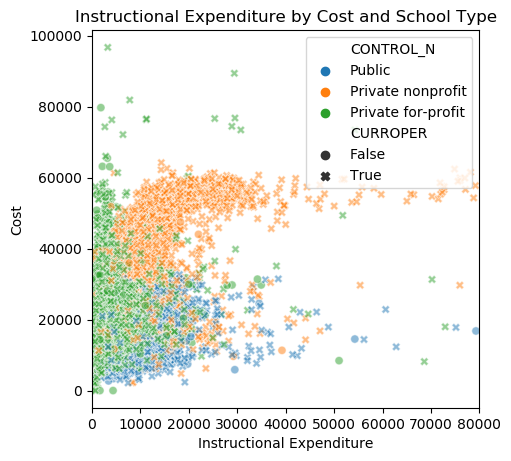

In [105]:
# Expenditure vs Net Price and Cost
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(2, 2, 1)
# sns.scatterplot('INEXPFTE', 'NetPrice', data=data, hue='CONTROL', marker='.', alpha=0.75)
# plt.xlabel('Instructional Expenditure')
# plt.ylabel('Net Price')
# plt.ylim([-25000, 80000])
# plt.title('Instructional Expenditure by Net Price and School Type')

#plt.subplot(2, 2, 2)
sns.scatterplot('INEXPFTE', 'Cost', data=data, hue='CONTROL_N', style='CURROPER', alpha=0.5)
plt.xlabel('Instructional Expenditure')
plt.ylabel('Cost')
plt.xlim([0, 80000])
plt.title('Instructional Expenditure by Cost and School Type')

# plt.subplot(2, 2, 3)
# sns.scatterplot('INEXPFTE', 'NetPrice', data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Instructional Expenditure')
# plt.ylabel('Net Price')
# plt.ylim([-25000, 80000])
# plt.title('Instructional Expenditure by Net Price and Operating Status')

# plt.subplot(2, 2, 1)
# sns.scatterplot('INEXPFTE', 'Cost', data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Instructional Expenditure')
# plt.ylabel('Cost')
# plt.xlim([0, 80000])
# plt.title('Instructional Expenditure by Cost and Operating Status')

# plt.tight_layout()
#plt.show()
plt.savefig('figures/ExpenditureCostControl.png',bbox_inches='tight')

## Median debt amounts
How does median debt relate to enrollment and control?

In [106]:
data.DEBT_MDN.groupby(data.CONTROL).mean()

CONTROL
1     9630.590419
2    15801.112730
3    10057.331220
Name: DEBT_MDN, dtype: float64

In [107]:
maxDebtDF = data.loc[data.DEBT_MDN > 50000]
maxDebtDF.shape

(7, 33)

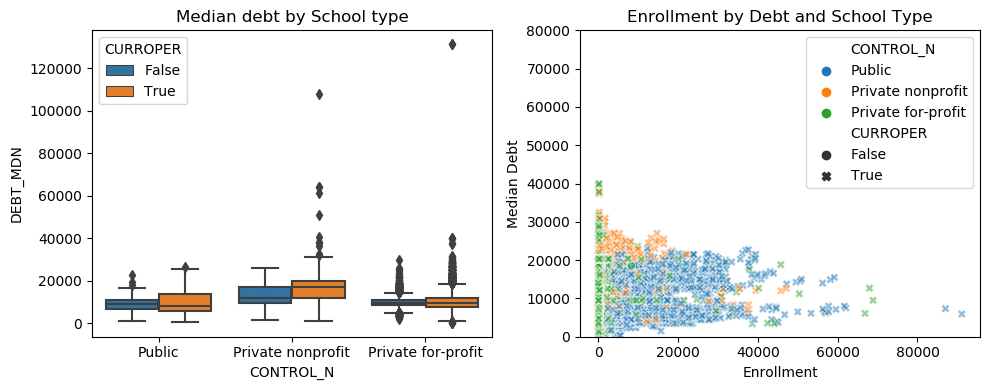

In [108]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL_N', 'DEBT_MDN', data=data, hue = 'CURROPER')
plt.title('Median debt by School type')

plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'DEBT_MDN', data=data, hue='CONTROL_N',  style='CURROPER', alpha=0.5)
plt.xlabel('Enrollment')
plt.ylabel('Median Debt')
plt.title('Enrollment by Debt and School Type')
plt.ylim(0, 80000)
plt.tight_layout()
#plt.show()
plt.savefig('figures/EnrollmentDebtControl.png',bbox_inches='tight')

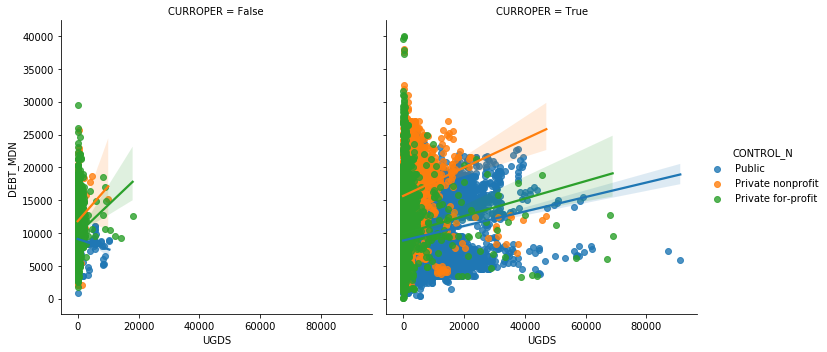

In [109]:
sns.lmplot( x='UGDS', y='DEBT_MDN', data=data , hue='CONTROL_N', col='CURROPER')

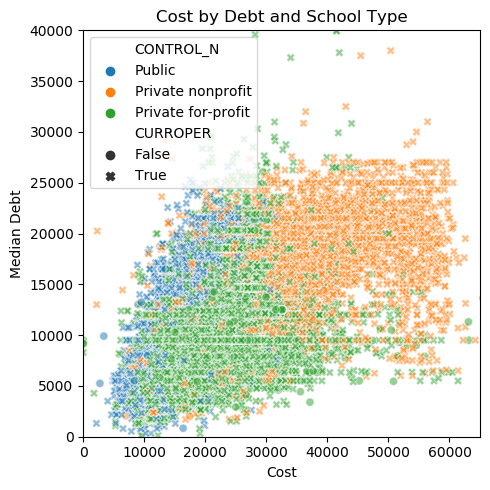

In [110]:
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# sns.scatterplot('Cost', 'DEBT_MDN', data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Cost')
# plt.ylabel('Median Debt')
# plt.title('Cost by Debt and Operating Status')
# plt.ylim(0, 40000)
# plt.xlim(0, 65000)

# plt.subplot(1, 2, 2)
sns.scatterplot('Cost', 'DEBT_MDN', data=data, hue='CONTROL_N', style='CURROPER', alpha=0.5)
plt.xlabel('Cost')
plt.ylabel('Median Debt')
plt.title('Cost by Debt and School Type')
plt.ylim(0, 40000)
plt.xlim(0, 65000)
#plt.legend(['Public', 'Nonprofit', 'For profit'])
plt.tight_layout()
#plt.show()
plt.savefig('figures/CostDebtControl.png',bbox_inches='tight')

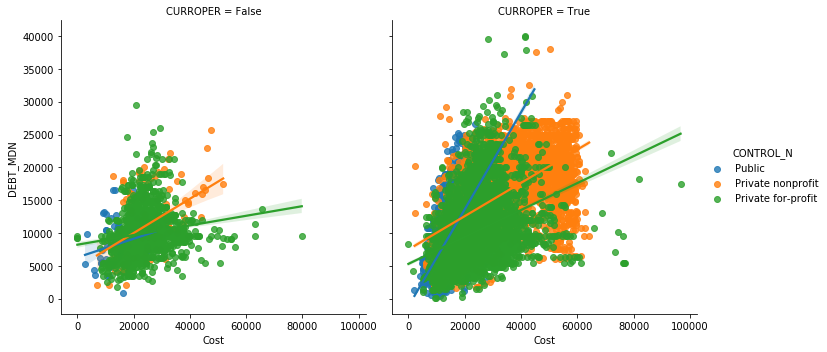

In [111]:
sns.lmplot( x='Cost', y='DEBT_MDN', data=data , hue='CONTROL_N', col='CURROPER')

Students at public and private for-profit schools have almost identical median debt levels. Private nonprofit schools have much higher median debt levels.

### Federal Loan

In [112]:
data.PCTFLOAN.groupby(data.CONTROL).mean()

CONTROL
1    0.319938
2    0.568881
3    0.639278
Name: PCTFLOAN, dtype: float64

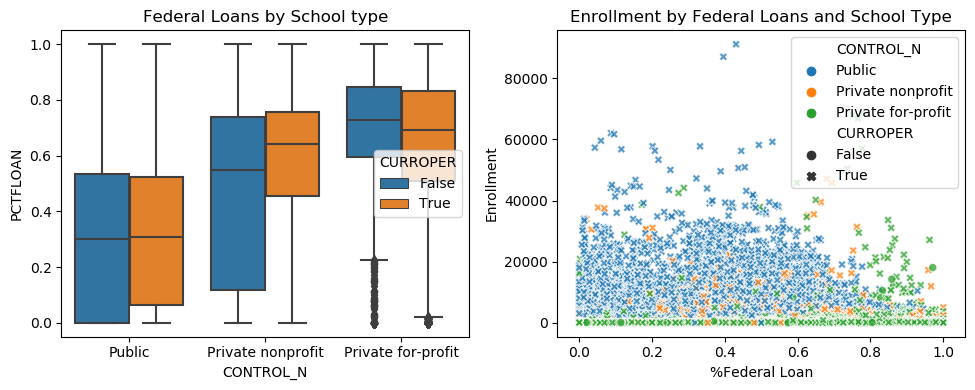

In [113]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL_N', 'PCTFLOAN', data=data, hue = 'CURROPER')
plt.title('Federal Loans by School type')

plt.subplot(1, 2, 2)
sns.scatterplot( 'PCTFLOAN','UGDS', data=data, hue='CONTROL_N', style='CURROPER', alpha=0.75)
plt.xlabel('%Federal Loan')
plt.ylabel('Enrollment')
plt.title('Enrollment by Federal Loans and School Type')
plt.tight_layout()
#plt.show()
plt.savefig('figures/PCTFLOANControl.png',bbox_inches='tight')

Text(0.5, 1.0, 'Federal Loans by Cost')

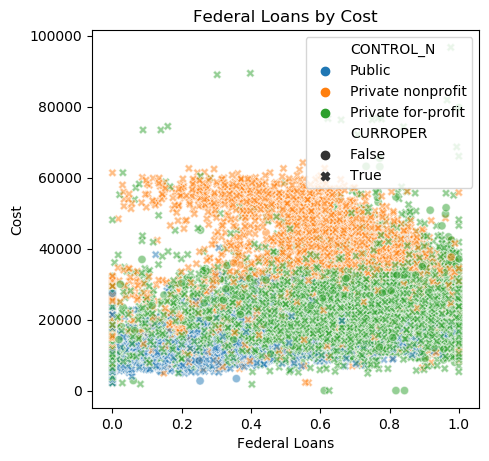

In [114]:
# Federal loans by NetPrice and Cost
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
#plt.subplot(2, 2, 1)
# sns.scatterplot('PCTFLOAN', 'NetPrice', data=data, hue='CONTROL_N', marker='.', alpha=0.75)
# plt.xlabel('Federal Loans')
# plt.ylabel('Net Price')
# plt.ylim([-25000, 80000])
# plt.title('Federal Loans by Net Price and School Type')

#plt.subplot(2, 2, 2)
sns.scatterplot('PCTFLOAN', 'Cost', data=data, hue='CONTROL_N', style='CURROPER', alpha=0.5)
plt.xlabel('Federal Loans')
plt.ylabel('Cost')
#plt.xlim([-25000, 80000])
plt.title('Federal Loans by Cost')

# plt.subplot(2, 2, 3)
# sns.scatterplot('PCTFLOAN', 'NetPrice', data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Federal Loans')
# plt.ylabel('Net Price')
# plt.ylim([-25000, 80000])
# plt.title('Federal Loans by Net Price and Operating Status')

# plt.subplot(2, 2, 1)
# sns.scatterplot('PCTFLOAN','Cost',  data=data, hue='CURROPER', marker='.', alpha=0.75)
# plt.xlabel('Federal Loans')
# plt.ylabel('Cost')
# #plt.xlim([-25000, 80000])
# plt.title('Federal Loans by Cost and Operating Status')

# plt.tight_layout()
#plt.show()

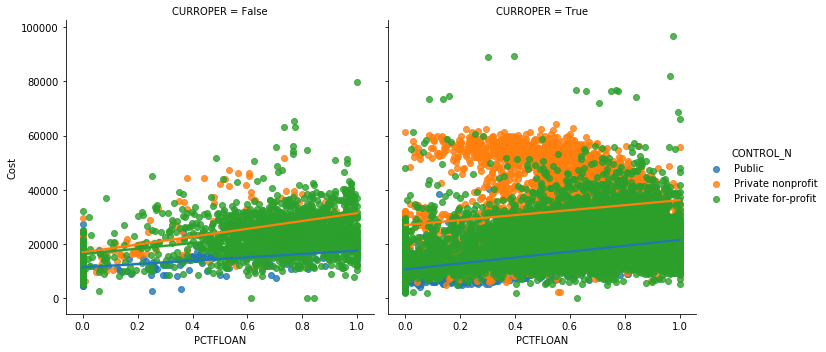

In [115]:
sns.lmplot( x='PCTFLOAN', y='Cost', data=data , hue='CONTROL_N', col='CURROPER')

### Completion, Withdrawn, Still enrolled
The first tables show the means for just the closed schools. The boxplots show the entire dataset.

In [116]:
closed.COMP_ORIG_YR4_RT.groupby(closed.CONTROL).mean()

CONTROL
1    0.217799
2    0.436290
3    0.485202
Name: COMP_ORIG_YR4_RT, dtype: float64

In [117]:
closed.WDRAW_ORIG_YR4_RT.groupby(closed.CONTROL).mean()

CONTROL
1    0.162049
2    0.140381
3    0.248279
Name: WDRAW_ORIG_YR4_RT, dtype: float64

In [118]:
closed.ENRL_ORIG_YR4_RT.groupby(closed.CONTROL).mean()

CONTROL
1    0.029678
2    0.016783
3    0.009596
Name: ENRL_ORIG_YR4_RT, dtype: float64

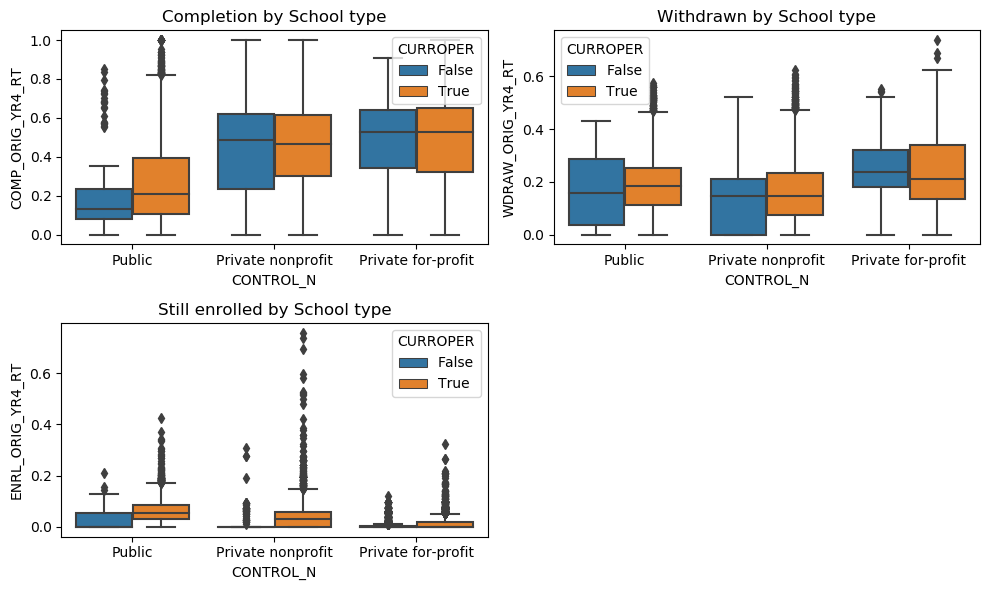

In [119]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
sns.boxplot('CONTROL_N', 'COMP_ORIG_YR4_RT', data=data, hue = 'CURROPER')
plt.title('Completion by School type')

plt.subplot(2, 2, 2)
sns.boxplot('CONTROL_N', 'WDRAW_ORIG_YR4_RT', data=data, hue = 'CURROPER')
plt.title('Withdrawn by School type')

plt.subplot(2, 2, 3)
sns.boxplot('CONTROL_N', 'ENRL_ORIG_YR4_RT', data=data, hue = 'CURROPER')
plt.title('Still enrolled by School type')
plt.tight_layout()
#plt.show()

(0, 1)

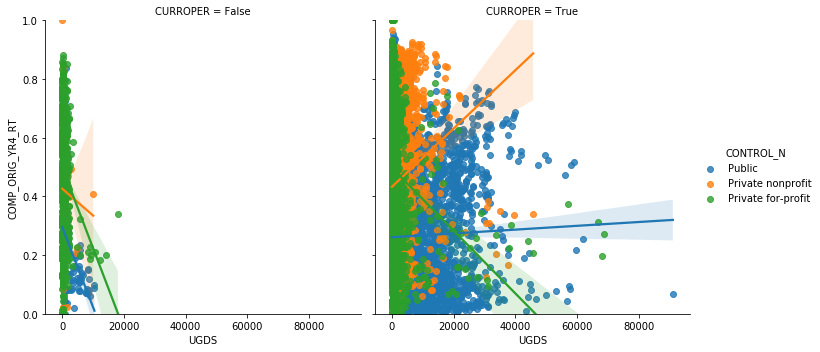

In [120]:
sns.lmplot( x='UGDS', y='COMP_ORIG_YR4_RT', data=data , hue='CONTROL_N', col='CURROPER')
plt.ylim(0, 1)

(0, 1)

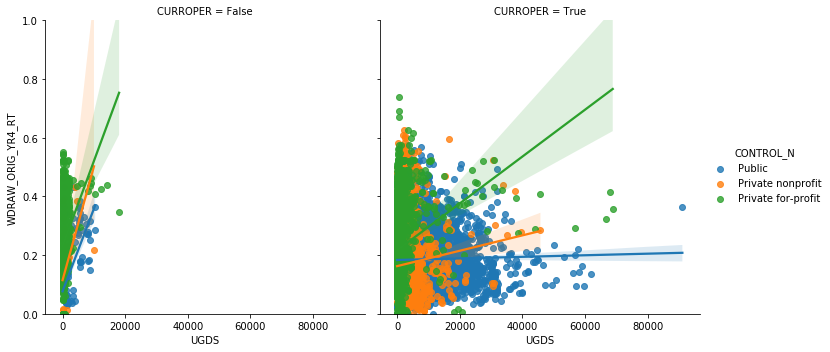

In [121]:
sns.lmplot( x='UGDS', y='WDRAW_ORIG_YR4_RT', data=data , hue='CONTROL_N', col='CURROPER')
plt.ylim(0, 1)

(0, 1)

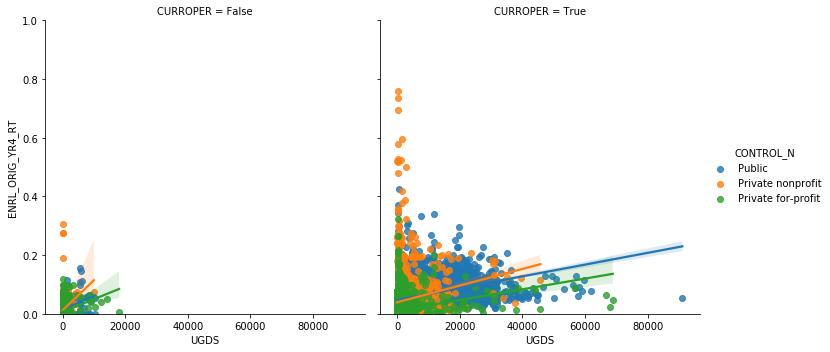

In [122]:
sns.lmplot( x='UGDS', y='ENRL_ORIG_YR4_RT', data=data , hue='CONTROL_N', col='CURROPER')
plt.ylim(0, 1)

### Completion and Retention Rates

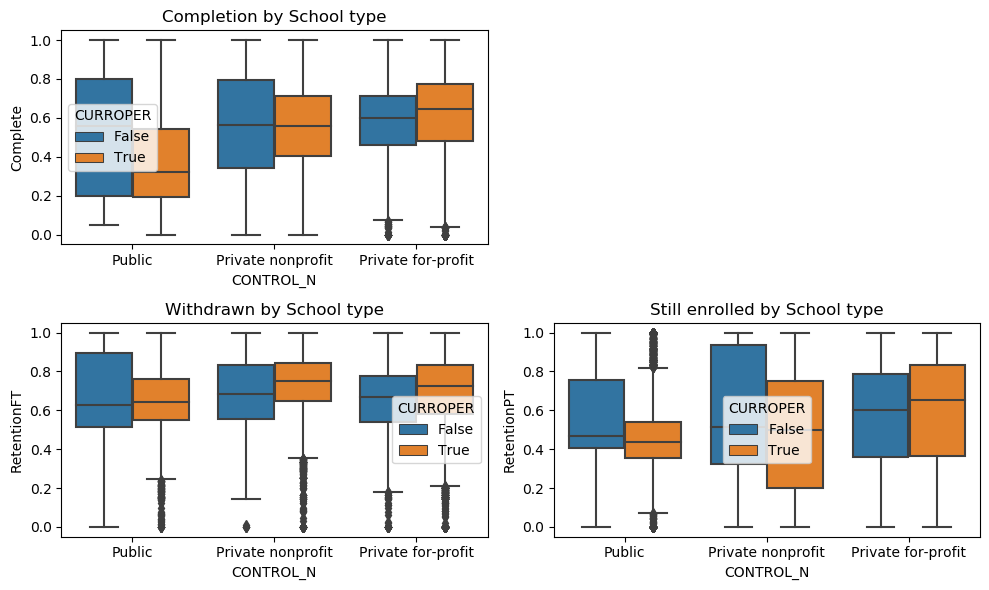

In [123]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
sns.boxplot('CONTROL_N', 'Complete', data=data, hue = 'CURROPER')
plt.title('Completion by School type')

plt.subplot(2, 2, 3)
sns.boxplot('CONTROL_N', 'RetentionFT', data=data, hue = 'CURROPER')
plt.title('Withdrawn by School type')

plt.subplot(2, 2, 4)
sns.boxplot('CONTROL_N', 'RetentionPT', data=data, hue = 'CURROPER')
plt.title('Still enrolled by School type')
plt.tight_layout()
#plt.show()

## CURROPER by school and year

In [124]:
year_pivot = data.pivot_table(index='Year', columns='CURROPER', aggfunc='size')
print(year_pivot)

CURROPER    False  True 
Year                    
2010-01-01    932   6481
2011-01-01    794   6880
2012-01-01    670   7122
2013-01-01    363   7440


In [125]:
closed_2013 = data.loc[(data.Year=='2013-01-01')&(data.CURROPER==0)]
closed_2013.shape

(363, 33)

In [126]:
everest = data.loc[data.INSTNM =='everest college-phoenix']
everest.head()

OPEID                   INSTNM     CITY  NUMBRANCH PREDDEG HIGHDEG  \
67     02295000  everest college-phoenix  Phoenix          2       1       3   
7483        NaN  everest college-phoenix  Phoenix          2       2       3   
22951       NaN  everest college-phoenix  Phoenix          2       2       3   

      CONTROL region  ADM_RATE    UGDS  ...     Cost    PREDDEG_N  \
67          3    6.0    0.4465  5662.0  ...  29445.0  Certificate   
7483        3    6.0       NaN  2254.0  ...  30946.0   Associates   
22951       3    6.0       NaN  2761.0  ...  25089.0   Associates   

                CONTROL_N  EnrollmentBins  TuitionBins  ExpenditureBins  \
67     Private for-profit              xl      highest             high   
7483   Private for-profit              xl      highest             high   
22951  Private for-profit              xl      highest             high   

       FacultyBins  Complete  RetentionFT  RetentionPT  
67             low    0.4075       0.4333          0.0  
7483           med    0.4123       0.4324          0.0  
22951         high    0.3175          NaN          1.0  

[3 rows x 33 columns]

Text(0.5, 1.0, 'Everest College Enrollment')

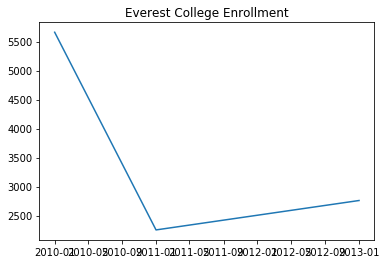

In [127]:
plt.plot('Year', 'UGDS', data=everest)
plt.title('Everest College Enrollment')
#plt.show()

# Feature Engineering and Selection

## Exploration of missing values

The data set contains several categorical features which, while helpful for identifying individual schools (like OPEID and INSTNM), I don't think will be useful or desireable for including in a model.

Also, several of the columns have a large number of null values, which will make them less usefull for model building.

In [128]:
data.isnull().sum() / data.shape[0]

OPEID                0.758393
INSTNM               0.000000
CITY                 0.000000
NUMBRANCH            0.000000
PREDDEG              0.000000
HIGHDEG              0.000000
CONTROL              0.000000
region               0.000033
ADM_RATE             0.700704
UGDS                 0.084512
CURROPER             0.000000
TUITFTE              0.050616
INEXPFTE             0.050616
AVGFACSAL            0.406655
PFTFAC               0.439639
PCTFLOAN             0.091226
UG25abv              0.542696
COMP_ORIG_YR4_RT     0.387263
WDRAW_ORIG_YR4_RT    0.412229
ENRL_ORIG_YR4_RT     0.488919
DEBT_MDN             0.146470
Year                 0.000000
NetPrice             0.220944
Cost                 0.136073
PREDDEG_N            0.000000
CONTROL_N            0.000000
EnrollmentBins       0.085653
TuitionBins          0.053321
ExpenditureBins      0.051855
FacultyBins          0.406655
Complete             0.179160
RetentionFT          0.184180
RetentionPT          0.508311
dtype: flo

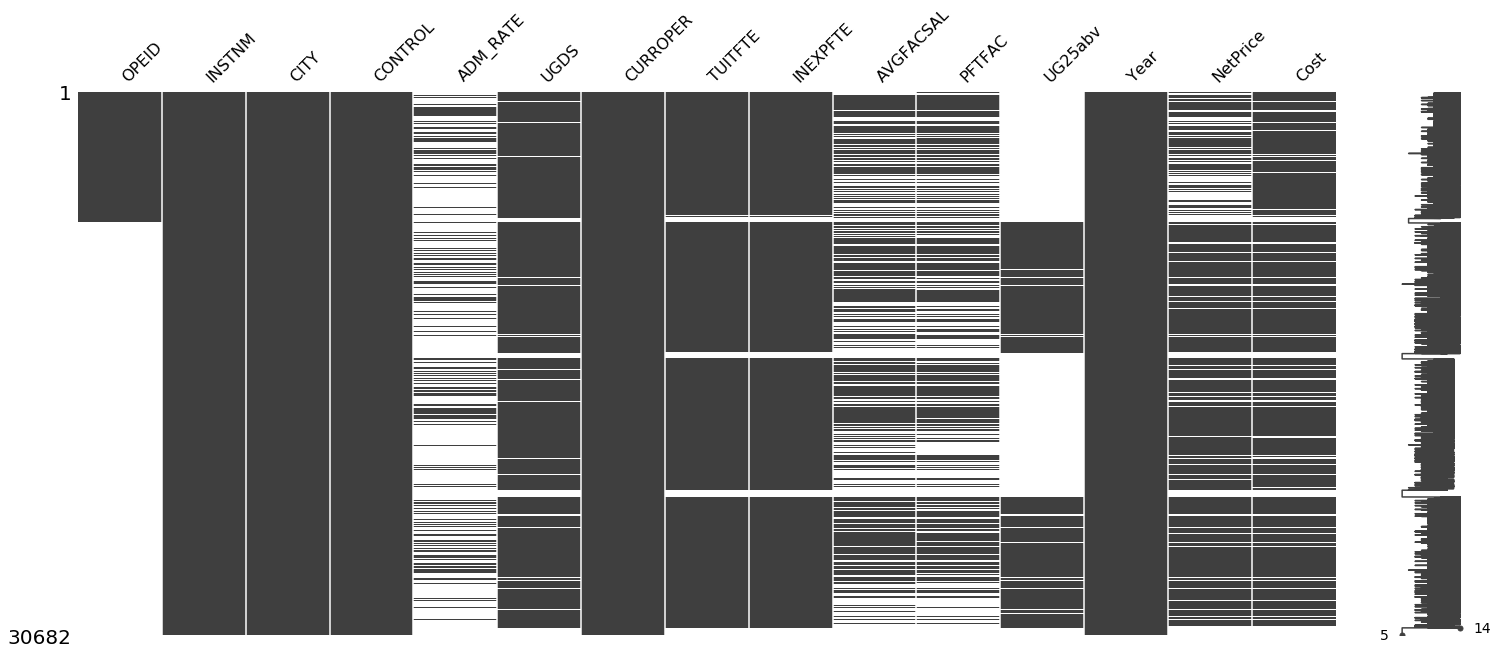

In [129]:
import missingno as msno
df = data[['OPEID', 'INSTNM', 'CITY', 'CONTROL', 'ADM_RATE', 'UGDS', 'CURROPER', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC', 'UG25abv', 'Year', 'NetPrice', 'Cost']]
msno.matrix(df)

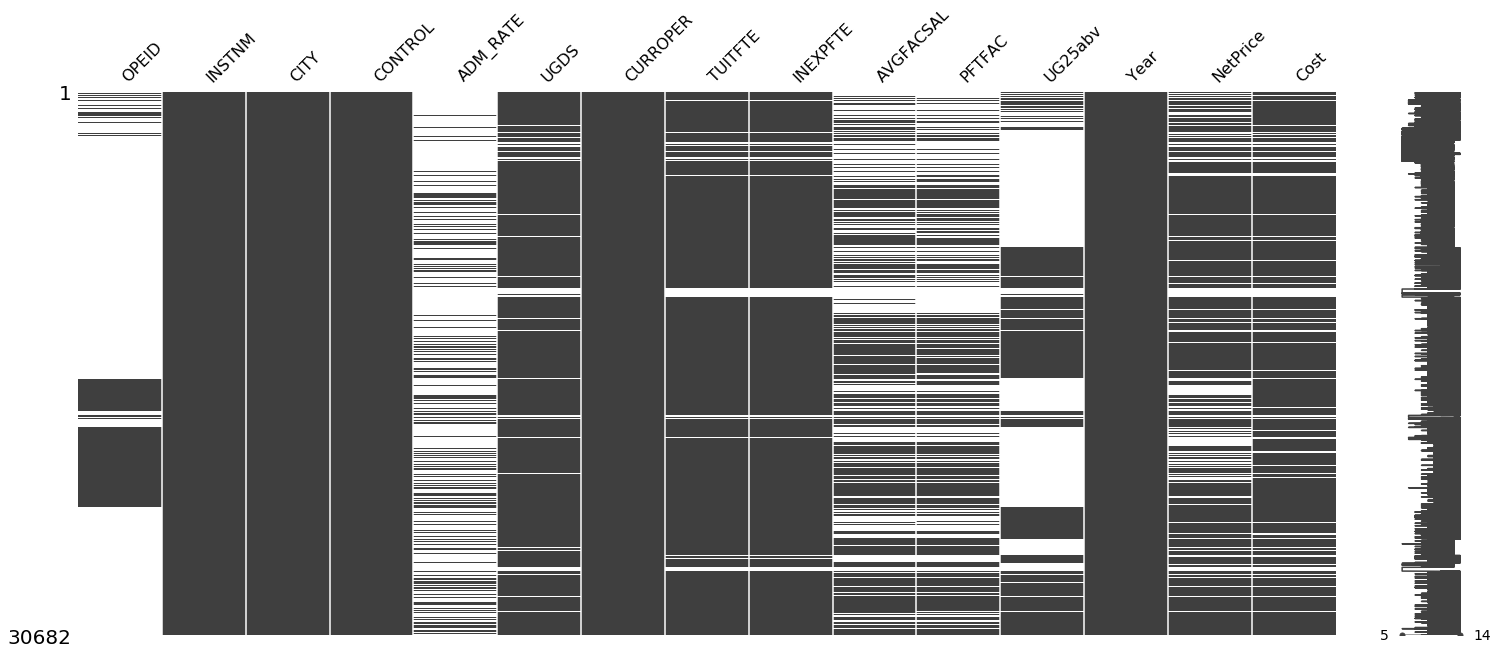

In [130]:
# Are there any systematic differences between data 
# reported for closed vs open institutions?
df_sorted = df.sort_values(by=['CURROPER'])
msno.matrix(df_sorted)

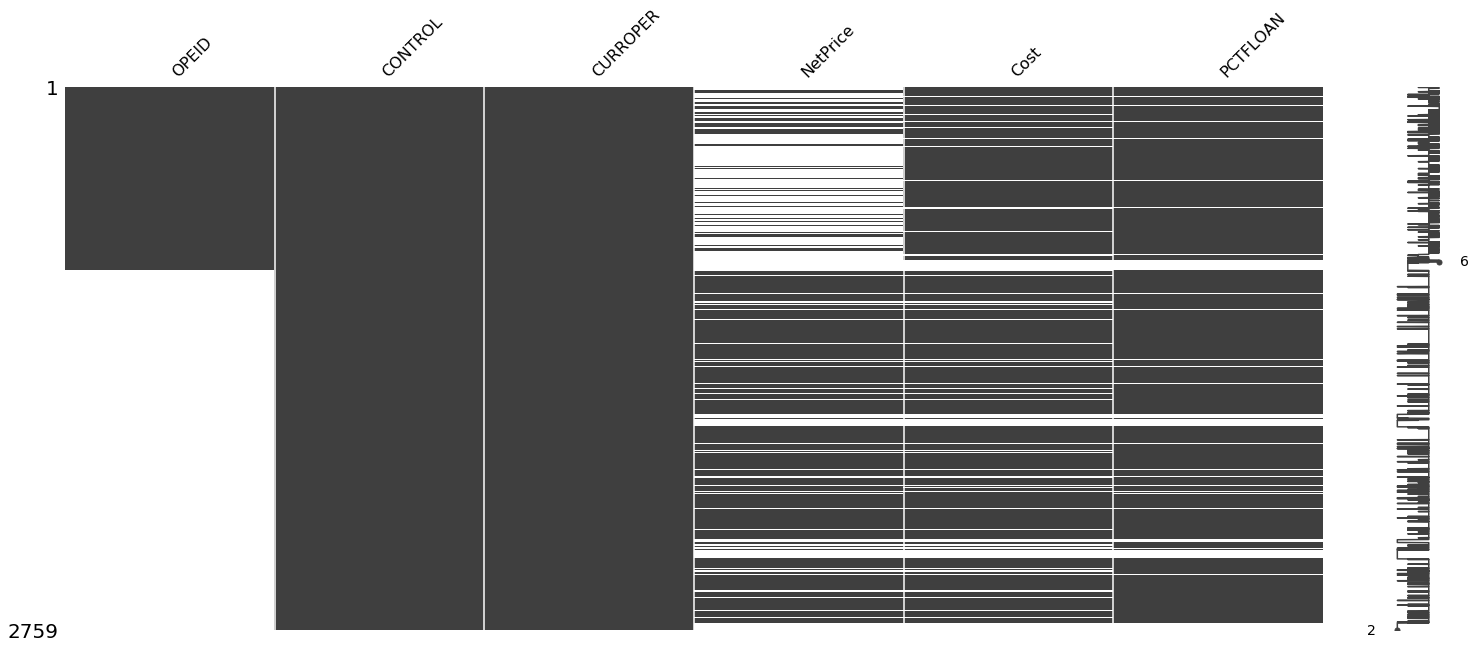

In [131]:
closed_sorted = closed[['OPEID', 'CONTROL', 'CURROPER', 'NetPrice', 'Cost', 'PCTFLOAN']]

msno.matrix(closed_sorted)

The UG25abv colum seems to be missing data every other year - according to the metadata, this information is provided every other year. Missing values could be easily imputed (via forward or backward fill) for each individual institution.

## Impute missing values - using all columns
While there are several categorical columns I intend to drop before the final analysis (like institution name and OPEID number), this information will be useful for imputing missing values is some columns. The plan is to impute the missing values, then drop the categorical columns.

In [132]:
# Fill missing OPEID values value from institution of the same name
# Else fill with 'Other'
print(data.OPEID.isnull().sum())
data['OPEID'] = data.groupby('INSTNM')['OPEID'].ffill()
data['OPEID'] = data.OPEID.fillna('Other')
print(data.OPEID.isnull().sum())

23269
0


In [133]:
# Fill missing CONTROL values from instituions of the same OPEID
print(data.CONTROL.isnull().sum())
data['CONTROL'] = data.groupby(['INSTNM'])['CONTROL'].ffill()
data['CONTROL'] = data.groupby(['OPEID', ])['CONTROL'].ffill()
print(data.CONTROL.isnull().sum())

0
0


In [134]:
# Fill missing UGDS values from institutions of the same name & OPEID, else impute with median from control and degree
# data.loc[data['UGDS'].isnull()]
print(data.UGDS.isnull().sum())
data['UGDS'] = data.groupby(['INSTNM'])['UGDS'].ffill()
print(data.UGDS.isnull().sum())
data['UGDS'] = data.groupby(['OPEID'])['UGDS'].ffill()
print(data.UGDS.isnull().sum())
data['UGDS'] = data.groupby(['CONTROL', 'PREDDEG'])['UGDS'].apply(lambda x: x.fillna(x.median()))
print(data.UGDS.isnull().sum())

2593
2360
1936
0


In [135]:
# Impute UG25abv. First, sort by school and year. Then forward fill.
print(data.UG25abv.isnull().sum())
data.sort_values(by = ['OPEID', 'INSTNM', 'Year'], inplace=True)
data.UG25abv.fillna(method='ffill', inplace=True)
data['UG25abv']=data.groupby(['CONTROL','PREDDEG'])['UG25abv'].apply(lambda x: x.fillna(x.median()))
print(data.UG25abv.isnull().sum())

16651
0


In [136]:
# Impute Tuition with median from 
# Impute TUITFTE columns with median values from groups
print(data.TUITFTE.isnull().sum())
data['TUITFTE']=data.groupby(['INSTNM', 'OPEID'])['TUITFTE'].ffill()
data['TUITFTE']=data.groupby(['CONTROL','PREDDEG'])['TUITFTE'].apply(lambda x: x.fillna(x.median()))
print(data.TUITFTE.isnull().sum())

1553
0


In [137]:
# Impute Expenditure with median from 
# Impute INEXPFTE columns with median values from groups
print(data.INEXPFTE.isnull().sum())
data['INEXPFTE']=data.groupby(['INSTNM', 'OPEID'])['INEXPFTE'].ffill()
data['INEXPFTE']=data.groupby(['CONTROL','PREDDEG'])['INEXPFTE'].apply(lambda x: x.fillna(x.median()))
print(data.INEXPFTE.isnull().sum())

1553
0


In [138]:
# Impute Net Price and Cost - since previous years values are missing, we'll try backfill
print(data.NetPrice.isnull().sum())
data['NetPrice']=data.groupby(['INSTNM', 'OPEID'])['NetPrice'].bfill()
data['NetPrice']=data.groupby(['CONTROL','PREDDEG'])['NetPrice'].apply(lambda x: x.fillna(x.median()))
print(data.NetPrice.isnull().sum())

6779
61


172 schools are publically controlled schools that offer predominatly graduate degrees, and there are not prices/costs listed for any schools with this combination of features. I'm going to impute these values from other institutions that primarily offer graduate degrees

In [139]:
data['NetPrice']= data.groupby(['PREDDEG'])['NetPrice'].apply(lambda x: x.fillna(x.median()))
print(data.NetPrice.isnull().sum())

0


In [140]:
print(data.Cost.isnull().sum())
data['Cost']=data.groupby(['INSTNM', 'OPEID'])['Cost'].bfill()
data['Cost']=data.groupby(['CONTROL','PREDDEG'])['Cost'].apply(lambda x: x.fillna(x.median()))
print(data.Cost.isnull().sum())
data['Cost'] = data.groupby(['PREDDEG'])['Cost'].apply(lambda x: x.fillna(x.median()))
print(data.Cost.isnull().sum())

4175
61
0


In [141]:
# Impute PFTFAC using ffill, grouped by institution name and id
print(data.PFTFAC.isnull().sum())
data['PFTFAC']=data.groupby(['INSTNM', 'OPEID'])['PFTFAC'].ffill()
print(data.PFTFAC.isnull().sum())
data['PFTFAC']=data.groupby(['CONTROL','PREDDEG'])['PFTFAC'].apply(lambda x: x.fillna(x.median()))
print(data.PFTFAC.isnull().sum())

13489
12123
0


In [142]:
# Impute Median Debt using ffill, grouped by institution name and id
print(data.DEBT_MDN.isnull().sum())
data['DEBT_MDN']=data.groupby(['INSTNM', 'OPEID'])['DEBT_MDN'].ffill()
print(data.DEBT_MDN.isnull().sum())
data['DEBT_MDN']=data.groupby(['CONTROL','PREDDEG'])['DEBT_MDN'].apply(lambda x: x.fillna(x.median()))
print(data.DEBT_MDN.isnull().sum())

4494
3994
0


In [143]:
# Impute Completion Rate using ffill, grouped by institution name and id
print(data.Complete.isnull().sum())
data['Complete']=data.groupby(['INSTNM', 'OPEID'])['Complete'].ffill()
print(data.Complete.isnull().sum())
data['Complete']=data.groupby(['CONTROL','PREDDEG'])['Complete'].apply(lambda x: x.fillna(x.median()))
data['Complete']= data.groupby(['PREDDEG'])['Complete'].apply(lambda x: x.fillna(x.median()))
print(data.Complete.isnull().sum())

5497
4904
0


In [144]:
# Impute Completion Rate using ffill, grouped by institution name and id
print(data.RetentionFT.isnull().sum())
data['RetentionFT']=data.groupby(['INSTNM', 'OPEID'])['RetentionFT'].ffill()
print(data.RetentionFT.isnull().sum())
data['RetentionFT']=data.groupby(['CONTROL','PREDDEG'])['RetentionFT'].apply(lambda x: x.fillna(x.median()))
print(data.RetentionFT.isnull().sum())
data['RetentionFT']=data.groupby(['PREDDEG'])['RetentionFT'].apply(lambda x: x.fillna(x.median()))
print(data.RetentionFT.isnull().sum())

5651
4890
61
0


In [145]:
print(data.COMP_ORIG_YR4_RT.isnull().sum())
data['COMP_ORIG_YR4_RT']=data.groupby(['INSTNM', 'OPEID'])['COMP_ORIG_YR4_RT'].ffill()
print(data.COMP_ORIG_YR4_RT.isnull().sum())
data['COMP_ORIG_YR4_RT']=data.groupby(['CONTROL','PREDDEG'])['COMP_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
print(data.COMP_ORIG_YR4_RT.isnull().sum())
#data['COMP_ORIG_YR4_RT']=data.groupby(['PREDDEG'])['COMP_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
#print(data.COMP_ORIG_YR4_RT.isnull().sum())

11882
5116
0


In [146]:
print(data.WDRAW_ORIG_YR4_RT.isnull().sum())
data['WDRAW_ORIG_YR4_RT']=data.groupby(['INSTNM', 'OPEID'])['WDRAW_ORIG_YR4_RT'].ffill()
print(data.WDRAW_ORIG_YR4_RT.isnull().sum())
data['WDRAW_ORIG_YR4_RT']=data.groupby(['CONTROL','PREDDEG'])['WDRAW_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
print(data.WDRAW_ORIG_YR4_RT.isnull().sum())
#data['COMP_ORIG_YR4_RT']=data.groupby(['PREDDEG'])['COMP_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
#print(data.COMP_ORIG_YR4_RT.isnull().sum())

12648
5587
0


In [147]:
print(data.ENRL_ORIG_YR4_RT.isnull().sum())
data['ENRL_ORIG_YR4_RT']=data.groupby(['INSTNM', 'OPEID'])['ENRL_ORIG_YR4_RT'].ffill()
print(data.ENRL_ORIG_YR4_RT.isnull().sum())
data['ENRL_ORIG_YR4_RT']=data.groupby(['CONTROL','PREDDEG'])['ENRL_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
print(data.ENRL_ORIG_YR4_RT.isnull().sum())
#data['COMP_ORIG_YR4_RT']=data.groupby(['PREDDEG'])['COMP_ORIG_YR4_RT'].apply(lambda x: x.fillna(x.median()))
#print(data.COMP_ORIG_YR4_RT.isnull().sum())

15001
7396
0


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30682 entries, 0 to 26121
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OPEID              30682 non-null  object        
 1   INSTNM             30682 non-null  object        
 2   CITY               30682 non-null  object        
 3   NUMBRANCH          30682 non-null  int64         
 4   PREDDEG            30682 non-null  category      
 5   HIGHDEG            30682 non-null  category      
 6   CONTROL            30682 non-null  category      
 7   region             30681 non-null  category      
 8   ADM_RATE           9183 non-null   float64       
 9   UGDS               30682 non-null  float64       
 10  CURROPER           30682 non-null  bool          
 11  TUITFTE            30682 non-null  float64       
 12  INEXPFTE           30682 non-null  float64       
 13  AVGFACSAL          18205 non-null  float64       
 14  PFTFAC

In [149]:
data.Year = data['Year'].dt.year

In [150]:
# ## Export processed data
data.to_csv('data/processed/DecisionTreeData2010.csv')

## Columns to drop

The data set contains several categorical features which, while helpful for identifying individual schools (like OPEID and INSTNM), I don't think will be useful or desireable for including in a model.

Also, several of the columns have a large number of null values, which will make them less usefull for model building.

In [151]:
# Drop Binning columns from dataframe
to_drop = ['OPEID', 'INSTNM', 'CITY', 'HIGHDEG', 'ADM_RATE', 'NetPrice', 'region','EnrollmentBins',\
           'TuitionBins','ExpenditureBins','FacultyBins', 'AVGFACSAL', 'RetentionPT', 'PCTFLOAN', 'CONTROL_N', 'PREDDEG_N']
df = data.drop(to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30682 entries, 0 to 26121
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NUMBRANCH          30682 non-null  int64   
 1   PREDDEG            30682 non-null  category
 2   CONTROL            30682 non-null  category
 3   UGDS               30682 non-null  float64 
 4   CURROPER           30682 non-null  bool    
 5   TUITFTE            30682 non-null  float64 
 6   INEXPFTE           30682 non-null  float64 
 7   PFTFAC             30682 non-null  float64 
 8   UG25abv            30682 non-null  float64 
 9   COMP_ORIG_YR4_RT   30682 non-null  float64 
 10  WDRAW_ORIG_YR4_RT  30682 non-null  float64 
 11  ENRL_ORIG_YR4_RT   30682 non-null  float64 
 12  DEBT_MDN           30682 non-null  float64 
 13  Year               30682 non-null  int64   
 14  Cost               30682 non-null  float64 
 15  Complete           30682 non-null  float64 
 16  Rete

In [152]:
#to_dummy_columns = ['PREDDEG', 'CONTROL']
#df = pd.get_dummies(df, drop_first=True)
df.sort_index(inplace=True)
df.head()

NUMBRANCH PREDDEG CONTROL     UGDS  CURROPER  TUITFTE  INEXPFTE  PFTFAC  \
0          1       3       1   4930.0      True   6746.0    6601.0  0.8263   
1          1       3       1  10661.0      True   6343.0   16090.0  0.9298   
2          1       3       2    370.0      True  11499.0    4879.0  0.5000   
3          1       3       1   5828.0      True   6548.0    8379.0  0.6326   
4          1       3       1   4882.0      True   6937.0    7386.0  0.6216   

   UG25abv  COMP_ORIG_YR4_RT  WDRAW_ORIG_YR4_RT  ENRL_ORIG_YR4_RT  DEBT_MDN  \
0   0.1970          0.228753           0.233519          0.162828   19000.0   
1   0.0853          0.391520           0.191249          0.115922   15296.0   
2   0.4427          0.376471           0.300000          0.037529   13853.0   
3   0.2422          0.350095           0.167932          0.120493   15000.0   
4   0.1203          0.094878           0.363213          0.115832   16500.0   

   Year     Cost  Complete  RetentionFT  
0  2010  13762.0    0.3306       0.7457  
1  2010  18003.0    0.4108       0.7997  
2  2010  20700.0    0.2308       0.8000  
3  2010  17064.0    0.4364       0.7545  
4  2010  14390.0    0.2399       0.6352

## Scale the data, then split into training and test sets

In [153]:
names = df.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [154]:
y = df['CURROPER']
X = scaled_df.drop('CURROPER', axis=1)

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [156]:
# Export imputed data with dummy columns
X_train.to_csv('data/processed/X2_train.csv')
X_test.to_csv('data/processed/X2_test.csv')
y_train.to_csv('data/processed/y2_train.csv')
y_test.to_csv('data/processed/y2_test.csv')